# Brazil / Lithium Exploratory Data Analysis (EDA)

### Load libraries

In [1]:
import pandas as pd
import os
import geopandas as gpd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.pyplot import cm
import matplotlib.patheffects as pe
from matplotlib.pyplot import figure
from matplotlib.lines import Line2D
import numpy as np
from array import array
import tabula
from tabula import read_pdf
import warnings
warnings.filterwarnings('ignore')
import logging
from mpldatacursor import datacursor
from itertools import cycle, islice
from textwrap import wrap

### Set root file variable

In [2]:
# root file variable
f = "./data/"

###  Loading spatial data
These are the shapefiles we will join our non-spatial data to

In [3]:
# point to the location in root we are storing our shapefiles
shp = "shp/"

In [4]:
# Municipalities
munic_fn = "BR_Municipios_2022/BR_Municipios_2022.shp"
munic = gpd.read_file(f + shp + munic_fn)

In [5]:
# Take a look at the data
munic.head()

,CD_MUN,NM_MUN,SIGLA_UF,AREA_KM2,geometry
0,1100015,Alta Floresta D'Oeste,RO,7067.127,"POLYGON ((-62.00806 -12.13379, -62.00784 -12.2..."
1,1100023,Ariquemes,RO,4426.571,"POLYGON ((-63.17933 -10.13924, -63.17746 -10.1..."
2,1100031,Cabixi,RO,1314.352,"POLYGON ((-60.52408 -13.32137, -60.37162 -13.3..."
3,1100049,Cacoal,RO,3793.000,"POLYGON ((-61.35502 -11.50452, -61.35524 -11.5..."
4,1100056,Cerejeiras,RO,2783.300,"POLYGON ((-60.82135 -13.11910, -60.81773 -13.1..."


In [6]:
# Load and clean Federative Units of Brazil
uni_fn = "BR_UF_2022/BR_UF_2022.shp"
uni = gpd.read_file(f + shp + uni_fn)
uni['NM_REGIAO'] = uni['NM_REGIAO'].str.replace('\n', '')
uni['NM_REGIAO'] = uni['NM_REGIAO'].str.replace('Centro-oeste', 'Centro-Oeste')
uni['coords'] = uni['geometry'].apply(lambda x: x.representative_point().coords[:])
uni['coords'] = [coords[0] for coords in uni['coords']]
n=27
l = []
color = iter(cm.rainbow(np.linspace(0, 1, n)))
for i in range(n):
    c = next(color)
    l.append(c)
uni['colour'] = l

In [7]:
# Create regional shapefile layer by dissolive Federative Units layer
regiao = uni.dissolve("NM_REGIAO").reset_index()

In [8]:
# Show top five rows of data
uni.head()

,CD_UF,NM_UF,SIGLA_UF,NM_REGIAO,AREA_KM2,geometry,coords,colour
0,12,Acre,AC,Norte,164173.429,"POLYGON ((-68.79282 -10.99957, -68.79367 -10.9...","(-70.71226383788643, -9.128825149999955)","[0.5, 0.0, 1.0, 1.0]"
1,13,Amazonas,AM,Norte,1559255.881,"POLYGON ((-56.76292 -3.23221, -56.76789 -3.242...","(-63.42992915479178, -3.7726362244999603)","[0.4294117647058824, 0.11065268189150083, 0.99..."
2,15,Pará,PA,Norte,1245870.704,"MULTIPOLYGON (((-48.97548 -0.19834, -48.97487 ...","(-51.993244521065925, -3.624690623999955)","[0.3509803921568627, 0.23194764145389815, 0.99..."
3,16,Amapá,AP,Norte,142470.762,"MULTIPOLYGON (((-51.04561 -0.05088, -51.05422 ...","(-52.02519124598603, 1.63441790400003)","[0.27254901960784317, 0.34972651120626114, 0.9..."
4,17,Tocantins,TO,Norte,277423.627,"POLYGON ((-48.24830 -13.19239, -48.24844 -13.1...","(-48.43060156305063, -9.319750193499939)","[0.1941176470588235, 0.46220388354031317, 0.97..."


In [9]:
# Load the shapefile of Brazil
br_fn = "BR_Pais_2022/BR_Pais_2022.shp"
br = gpd.read_file(f + shp + br_fn)

In [10]:
# Show top five rows of data
regiao.head()

,NM_REGIAO,geometry,CD_UF,NM_UF,SIGLA_UF,AREA_KM2,coords,colour
0,Centro-Oeste,"POLYGON ((-54.68763 -23.83257, -54.69158 -23.8...",50,Mato Grosso do Sul,MS,357142.082,"(-54.78799159607398, -20.6178304895)","[1.0, 0.5676747161445903, 0.29727685063120274,..."
1,Nordeste,"MULTIPOLYGON (((-44.58770 -2.23098, -44.58787 ...",21,Maranhão,MA,329651.496,"(-45.27819124057096, -5.655954034999954)","[0.11568627450980395, 0.5676747161445901, 0.95..."
2,Norte,"MULTIPOLYGON (((-62.61374 -13.01363, -62.61907...",12,Acre,AC,164173.429,"(-70.71226383788643, -9.128825149999955)","[0.5, 0.0, 1.0, 1.0]"
3,Sudeste,"MULTIPOLYGON (((-48.03773 -25.35624, -48.03747...",31,Minas Gerais,MG,586513.983,"(-45.18576713252065, -18.578052808)","[0.5745098039215686, 0.9931586661366362, 0.664..."
4,Sul,"MULTIPOLYGON (((-51.74802 -31.86998, -51.75479...",41,Paraná,PR,199298.981,"(-51.81630876724485, -24.6172965365)","[0.888235294117647, 0.8197404829072211, 0.4622..."


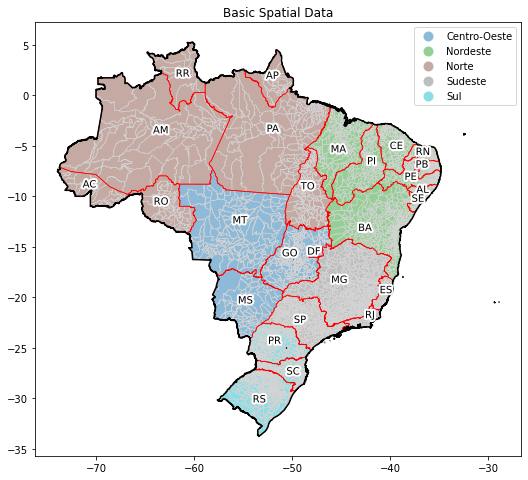

In [11]:
# Visualize our collection of basic spatial data

fig, ax = plt.subplots()

fig.set_figheight(10)
fig.set_figwidth(10)
fig.subplots_adjust(right=0.8)
regiao.plot(ax=ax,column='NM_REGIAO', legend = True, alpha=0.5)
munic.boundary.plot(ax=ax, linewidth = 0.5, color = 'lightgray')
uni.boundary.plot(ax=ax, linewidth = 0.7, color= 'red')
br.boundary.plot(ax=ax, color='black')

for idx, row in uni.iterrows():   
    plt.annotate(text=str(row['SIGLA_UF']), xy=row['coords'], horizontalalignment='center', color='black', path_effects=[pe.withStroke(linewidth=4, foreground="white")])

ax.title.set_text('Basic Spatial Data')
    
plt.show()

In [12]:
# Load mining concession shapefile
mining_con_fn = "Brazil_mining_concessions/Brazil_mining_concessions.shp"
mining_con = gpd.read_file(f + shp + mining_con_fn)

In [13]:
# Show top five rows of data
mining_con.head()

,objectid,id,numero,ano,area_ha,fase,ult_evento,nome,subs,uso,uf,status,globalid,shape_Leng,shape_Area,geometry
0,203664,{091DBD66-885B-4F55-B476-A79C26B28246},880147,1979,9800.0,AUTORIZAÇÃO DE PESQUISA,290 - AUT PESQ/RELATORIO PESQ FINAL APRESENTAD...,MINERAÇÃO IGUAPO LTDA,WOLFRAMITA,NÃO INFORMADO,AC,Exploration,{3D22252D-8F73-4596-A873-28DDF32A2B4D},40944.915251,1.003029e+08,"POLYGON Z ((-73.65896 -7.36562 0.00000, -73.65..."
1,203665,{3AE579FD-F0B7-4CA1-A18B-77E3F9C942B6},880954,1985,50.0,CONCESSÃO DE LAVRA,440 - CONC LAV/ROTULO ÁGUA MINERAL APROVADO PU...,Verona Mineração Indústria e Comércio Ltda,ÁGUA MINERAL,NÃO INFORMADO,AC,Exploitation,{C536EEAC-DBC8-4400-9215-711BA3AB4829},3053.873800,5.192398e+05,"POLYGON Z ((-67.73617 -10.13297 0.00000, -67.7..."
2,203666,{BE2987A8-9D73-4D89-BF84-F4A1796CA491},880468,1987,10000.0,REQUERIMENTO DE PESQUISA,619 - REQ PESQ/PROCESSO SITUADO EM ÁREA INDÍGE...,EXPLORER MINERAÇÃO LTDA,PRATA,NÃO INFORMADO,AC,In application,{2A1BDF1F-9E85-4249-83A7-FA6AA7F64BF9},40467.951019,1.023523e+08,"POLYGON Z ((-73.33693 -7.36168 0.00000, -73.33..."
3,203667,{720585BA-00BA-4261-A81D-224733E91402},880469,1987,10000.0,REQUERIMENTO DE PESQUISA,619 - REQ PESQ/PROCESSO SITUADO EM ÁREA INDÍGE...,EXPLORER MINERAÇÃO LTDA,PRATA,NÃO INFORMADO,AM,In application,{6F3D16D0-CBE8-4698-888F-E6E1894F9ECE},40467.951709,1.023523e+08,"POLYGON Z ((-73.33693 -7.36168 0.00000, -73.24..."
4,203668,{734009C7-11D1-4D7F-9BB3-551A280D136E},880002,1992,50.0,CONCESSÃO DE LAVRA,473 - CONC LAV/CUMPRIMENTO EXIGÊNCIA PROTOCOLI...,EMPRESA DE ÁGUA MINERAL MONTE MÁRIO LTDA,ÁGUA MINERAL,NÃO INFORMADO,AC,Exploitation,{54E93E61-A6FC-42E0-8115-687319922E68},3059.315900,5.188346e+05,"POLYGON Z ((-67.80873 -10.00312 0.00000, -67.8..."


In [14]:
# Subset the mining concession layer to include only lithium concessions
li_con = mining_con.loc[mining_con['subs'] == 'LÍTIO']

In [15]:
# Load mineral resource layer
mineral_res_fn = "mrds-fBR.shp"
mineral_res = gpd.read_file(f + shp + mineral_res_fn)

In [16]:
# Subset the mineral resource layer to include only lithium resources
li_res = mineral_res[mineral_res.commod1.str.contains('Lithium', na=False)]

In [17]:
# Load Indigenous territories layer
terr_indig_fn = "Indigenas_Quilombolas/Territ┬ório Ind┬░gena.shp"
terr_indig = gpd.read_file(f + shp + terr_indig_fn)

In [18]:
# Load Quilombola territories layer
terr_quilo_fn = "Indigenas_Quilombolas/Territ┬ório Quilombola.shp"
terr_quilo = gpd.read_file(f + shp + terr_quilo_fn)

In [19]:
# Load Garimpo layer
garimpo_fn = "GEOFT_GARIMPO/GEOFT_GARIMPO.shp"
garimpo = gpd.read_file(f + shp + garimpo_fn)

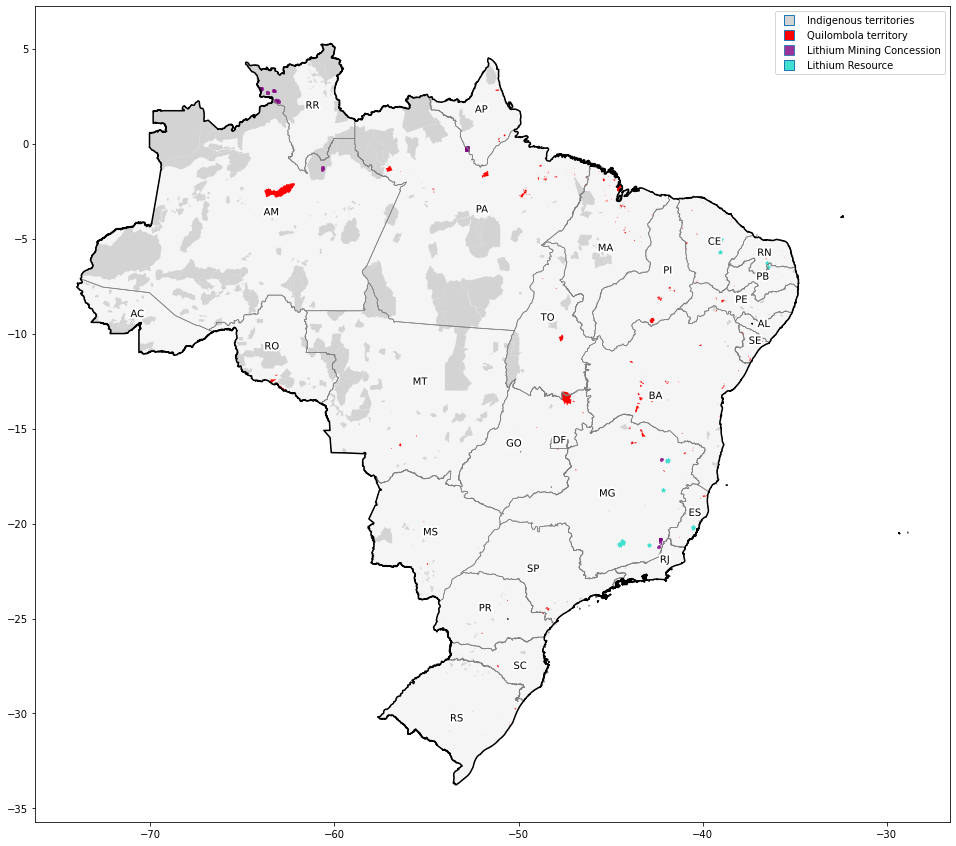

In [20]:
# View lithium resources and mining concessions proximity to Indigenous 
# and Quilombola territories

fig, ax = plt.subplots()

fig.set_figheight(15)
fig.set_figwidth(30)
br.plot(ax=ax, color='whitesmoke')
terr_indig.plot(ax=ax, color='lightgrey', label='Indigenous territories')
terr_quilo.plot(ax=ax, color='red', label= 'Quilombola territory')
li_con.plot(ax=ax, color='purple', edgecolor='purple', linewidth=3, alpha = 0.8, label='Lithium Mining Concession')
uni.boundary.plot(ax=ax, linewidth = 0.7, color= 'grey')
li_res.plot(ax=ax, marker='*', markersize=15, color= 'turquoise', label='Lithium Resource')
br.boundary.plot(ax=ax, color='black')

lines = [
    Line2D([0], [0], linestyle="none", marker="s", markersize=10, markerfacecolor=t.get_facecolor())
    for t in ax.collections[0:]
]
labels = [t.get_label() for t in ax.collections]

for idx, row in uni.iterrows():   
    plt.annotate(text=str(row['SIGLA_UF']), xy=row['coords'], horizontalalignment='center', color='black', path_effects=[pe.withStroke(linewidth=4, foreground="white")])

ax.legend(lines, labels)
plt.show()

The above map shows that lithium concessions (purple) in Brazil are primarily concentrated in the North, with one concession in Minas Gerais. Minas Girais has the greatest number of lithium deposits (teal).

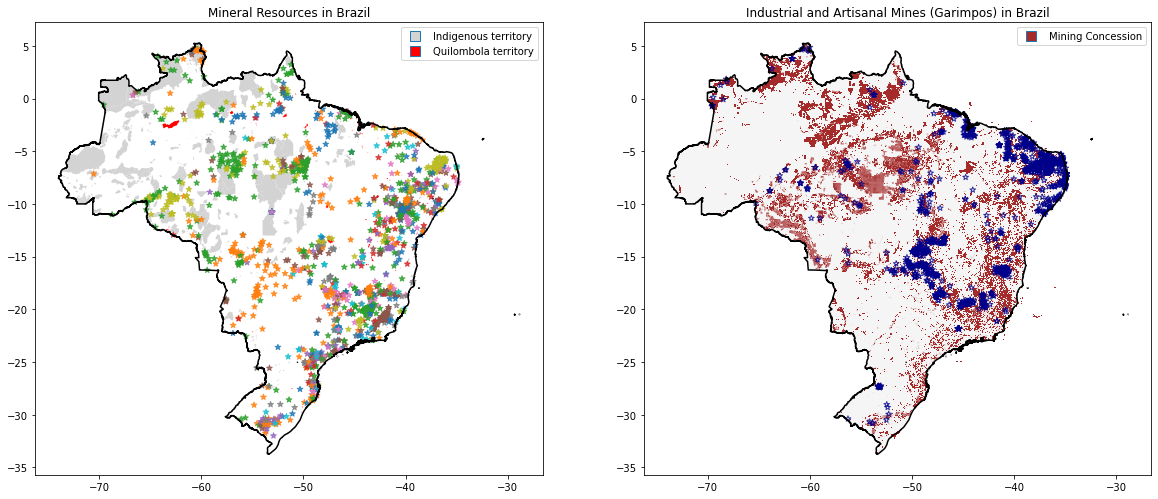

In [21]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,15))

color = iter(cm.rainbow(np.linspace(0, 1, n)))
for i in range(n):
    c = next(color)

terr_indig.plot(ax=ax1, color='lightgrey', label='Indigenous territory')
terr_quilo.plot(ax=ax1, color='red', label= 'Quilombola territory')
mineral_res.plot(ax=ax1, marker='*', column= 'commod1', alpha=0.8)
br.boundary.plot(ax=ax1, color='black')

br.plot(ax=ax2, color='whitesmoke')
mining_con.plot(ax=ax2, color='brown', label='Mining Concession') # column = 'subs' 
garimpo.plot(ax=ax2, marker='*', facecolors='none', edgecolors='darkblue', alpha=0.8) # column= 'GAR_DS_SUB'
br.boundary.plot(ax=ax2, color='black')

ax1.title.set_text('Mineral Resources in Brazil')
ax2.title.set_text('Industrial and Artisanal Mines (Garimpos) in Brazil')

lines1 = [
    Line2D([0], [0], linestyle="none", marker="s", markersize=10, markerfacecolor=t.get_facecolor())
    for t in ax1.collections[0:]
]
labels1 = [t.get_label() for t in ax1.collections]

lines2 = [
    Line2D([0], [0], linestyle="none", marker="s", markersize=10, markerfacecolor=t.get_facecolor())
    for t in ax2.collections[0:]
]
labels2 = [t.get_label() for t in ax2.collections]

ax1.legend(lines1, labels1)
ax2.legend(lines2, labels2)
plt.show()

Above left: general plotting of mineral resources (all categories) in Brazil.  
Above right: Locations of garimpos (industrial and artisanal mines) (blue) and mining concessions (brown).

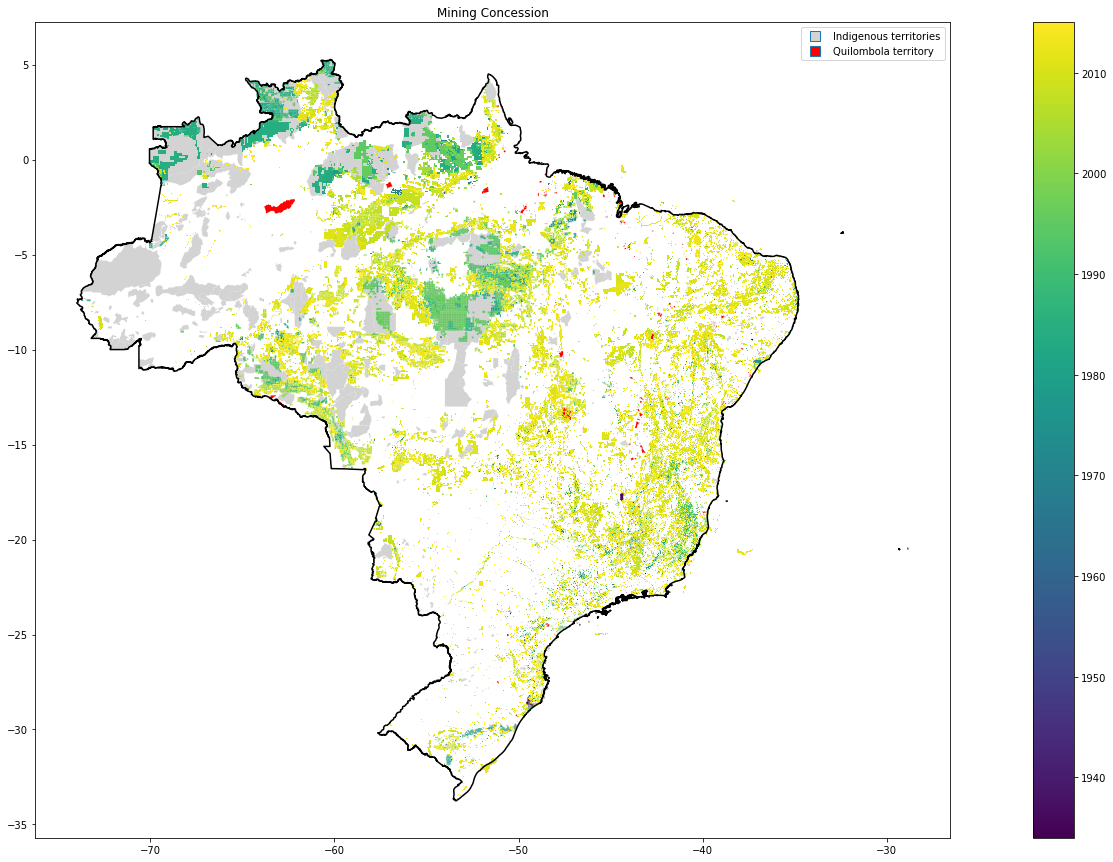

In [22]:
fig, ax = plt.subplots()

fig.set_figheight(15)
fig.set_figwidth(30)
terr_indig.plot(ax=ax, color='lightgrey', label='Indigenous territories')
terr_quilo.plot(ax=ax, color='red', label= 'Quilombola territory')
mining_con.plot(ax=ax, column='ano', legend=True)
br.boundary.plot(ax=ax, color='black')

lines = [
    Line2D([0], [0], linestyle="none", marker="s", markersize=10, markerfacecolor=t.get_facecolor())
    for t in ax.collections
]
labels = [t.get_label() for t in ax.collections]

ax.legend(lines, labels)
plt.title("Mining Concession")
plt.show()

Above: Brazilian mining concessions symbolized by year granted. Map also shows Indigenous territories and Quilombola terriroties (the latter are descendants of escaped slaves).

## Analysis


In [23]:
# data directory variables

# 1_General
g = '1_General_xls' + '/'
# Work / Income
w = '2_Work_Income_xls' + '/'
# Violence
v = '5_Violence_xls' + '/'

In [24]:
df_race_fn = f + 'Tabela_02_Pop_resid_por_cor_ou_raca_e_pessoas_indigenas_2022_BR_GR.xlsx'
col_names = ['Grandes Regiões', 'Cód.', 'Total', 'a_Branca', 'a_Preta', 'a_Amarela', 'a_Parda', 'a_Indígena', 'a_Ignorados', 'p_Branca', 'p_Preta', 'p_Amarela', 'p_Parda', 'p_Indígena', 'Absoluto', 'Percentual']
df_race = pd.read_excel(df_race_fn, names=col_names, skiprows=8)[:6]

### Overall race representation

In [25]:
# Absolute and percentage race data by Grand Regions
# join w: brazil layer, uni -> region
# remove Região from Grand Region column
df_race = df_race.replace('Região ', '', regex=True)
df_race

,Grandes Regiões,Cód.,Total,a_Branca,a_Preta,a_Amarela,a_Parda,a_Indígena,a_Ignorados,p_Branca,p_Preta,p_Amarela,p_Parda,p_Indígena,Absoluto,Percentual
0,Brasil,76.0,203 080 756,88252121.0,20656458.0,850130.0,92083286.0,1227642.0,11 119,43.459043,10.172106,0.418640,45.345669,0.604542,1694836.0,0.834563
1,Norte,1.0,17 355 778,3598439.0,1530568.0,29467.0,11654993.0,539821.0,2 490,20.736353,8.820046,0.169806,67.163024,3.110771,753780.0,4.343107
2,Nordeste,2.0,54 657 621,14571416.0,7126868.0,68749.0,32559243.0,327725.0,3 620,26.661206,13.039975,0.125790,59.573393,0.599636,529128.0,0.968077
3,Sudeste,3.0,84 840 113,42318768.0,9003372.0,570852.0,32833389.0,109934.0,3 798,49.882846,10.612639,0.672886,38.702045,0.129584,123434.0,0.145490
4,Sul,4.0,29 937 706,21729713.0,1505526.0,120838.0,6499382.0,81478.0,769,72.584958,5.028991,0.403642,21.710244,0.272165,88341.0,0.295083
5,Centro-Oeste,5.0,16 289 538,6033785.0,1490124.0,60224.0,8536279.0,168684.0,442,37.041865,9.147985,0.369720,52.404866,1.035564,200153.0,1.228721


In [26]:
regiao_race = pd.merge(regiao, df_race, left_on="NM_REGIAO", right_on="Grandes Regiões")
regiao_race = regiao_race.drop(['CD_UF', 'NM_UF', 'SIGLA_UF', 'AREA_KM2'], axis=1)
regiao_race['coords'] = regiao_race['geometry'].apply(lambda x: x.representative_point().coords[:])
regiao_race['coords'] = [coords[0] for coords in regiao_race['coords']]
regiao_race

,NM_REGIAO,geometry,coords,colour,Grandes Regiões,Cód.,Total,a_Branca,a_Preta,a_Amarela,a_Parda,a_Indígena,a_Ignorados,p_Branca,p_Preta,p_Amarela,p_Parda,p_Indígena,Absoluto,Percentual
0,Centro-Oeste,"POLYGON ((-54.68763 -23.83257, -54.69158 -23.8...","(-53.53233074000234, -15.70935745399995)","[1.0, 0.5676747161445903, 0.29727685063120274,...",Centro-Oeste,5.0,16 289 538,6033785.0,1490124.0,60224.0,8536279.0,168684.0,442,37.041865,9.147985,0.369720,52.404866,1.035564,200153.0,1.228721
1,Nordeste,"MULTIPOLYGON (((-44.58770 -2.23098, -44.58787 ...","(-41.21432993659769, -9.698586015999954)","[0.11568627450980395, 0.5676747161445901, 0.95...",Nordeste,2.0,54 657 621,14571416.0,7126868.0,68749.0,32559243.0,327725.0,3 620,26.661206,13.039975,0.125790,59.573393,0.599636,529128.0,0.968077
2,Norte,"MULTIPOLYGON (((-62.61374 -13.01363, -62.61907...","(-58.65098078783865, -4.21097474049995)","[0.5, 0.0, 1.0, 1.0]",Norte,1.0,17 355 778,3598439.0,1530568.0,29467.0,11654993.0,539821.0,2 490,20.736353,8.820046,0.169806,67.163024,3.110771,753780.0,4.343107
3,Sudeste,"MULTIPOLYGON (((-48.03773 -25.35624, -48.03747...","(-45.52970616919217, -19.7740080499999)","[0.5745098039215686, 0.9931586661366362, 0.664...",Sudeste,3.0,84 840 113,42318768.0,9003372.0,570852.0,32833389.0,109934.0,3 798,49.882846,10.612639,0.672886,38.702045,0.129584,123434.0,0.145490
4,Sul,"MULTIPOLYGON (((-51.74802 -31.86998, -51.75479...","(-52.094304275906794, -28.13374165649995)","[0.888235294117647, 0.8197404829072211, 0.4622...",Sul,4.0,29 937 706,21729713.0,1505526.0,120838.0,6499382.0,81478.0,769,72.584958,5.028991,0.403642,21.710244,0.272165,88341.0,0.295083


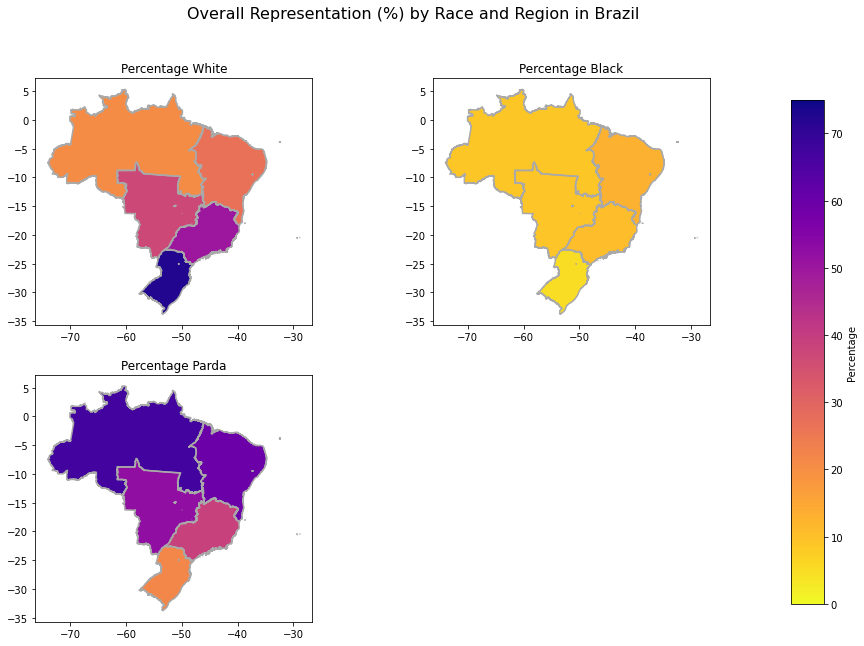

In [27]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(15, 10))
ax4.set_visible(False)

fig.suptitle("Overall Representation (%) by Race and Region in Brazil", fontsize=16)

# Normalize color scale to range
vmin, vmax = 0, 75
norm = mcolors.Normalize(vmin=vmin, vmax=vmax)

fig.subplots_adjust(right=0.8)

regiao.plot(ax=ax,column='NM_REGIAO', legend = True, alpha=0.5)

regiao_race.plot(ax=ax1, column='p_Branca', cmap='plasma_r', norm=norm)
regiao.boundary.plot(ax=ax1,color='darkgrey')
regiao_race.plot(ax=ax2, column='p_Preta', cmap='plasma_r', norm=norm)
regiao.boundary.plot(ax=ax2,color='darkgrey')
regiao_race.plot(ax=ax3, column='p_Parda', cmap='plasma_r', norm=norm)
regiao.boundary.plot(ax=ax3,color='darkgrey')

# Set titles for each subplot
ax1.set_title('Percentage White')
ax2.set_title('Percentage Black')
ax3.set_title('Percentage Parda')

# Add colorbar
sm = plt.cm.ScalarMappable(cmap='plasma_r', norm=norm)
cbar_ax = fig.add_axes([0.85, 0.15, 0.03, 0.7])
cbar = fig.colorbar(sm, cax=cbar_ax)
cbar.set_label('Percentage')

plt.show()

In [28]:
regiao_maj_race = regiao_race
regiao_maj_race["Max (%)"] = regiao_maj_race[['p_Branca', 'p_Preta', 'p_Parda']].max(axis=1).round(2)
regiao_maj_race["Maj Race"] = regiao_maj_race[['p_Branca', 'p_Preta', 'p_Parda']].idxmax(axis=1).str.replace('p_', '')
regiao_maj_race["coords"]= regiao_maj_race["geometry"].apply(lambda x: x.representative_point().coords[:])
regiao_race["coords"] = [coords[0] for coords in regiao_race["coords"]]

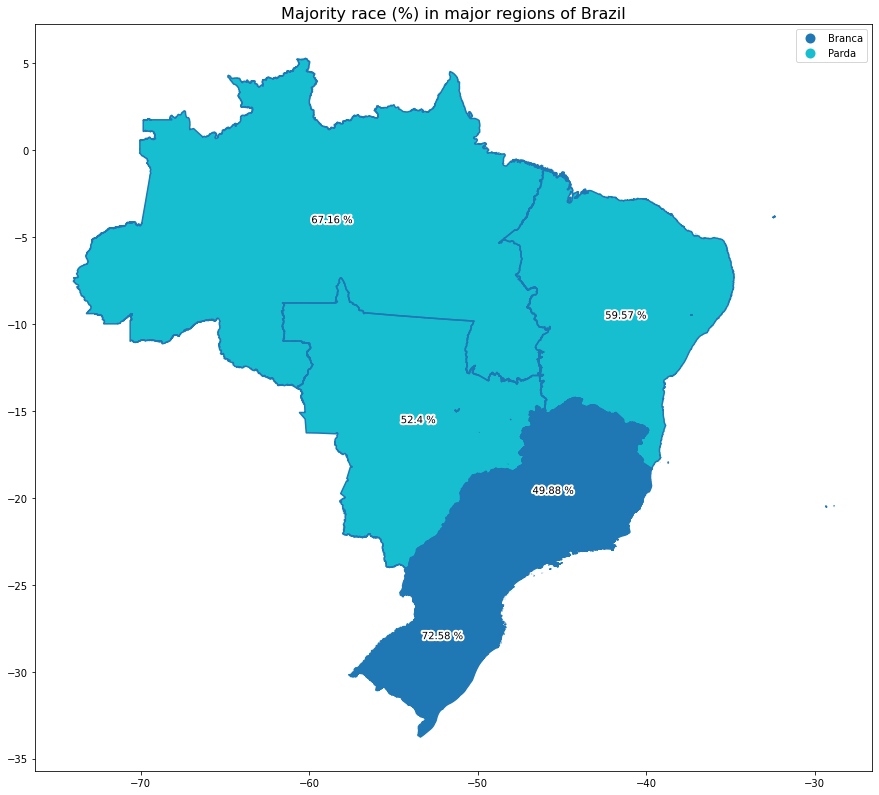

In [29]:
# Majority race in major regions of Brazil
ax = regiao_maj_race.plot(column='Maj Race', legend=True, figsize=(15,15))
plt.title("Majority race (%) in major regions of Brazil", fontsize=16)
for idx, row in regiao_maj_race.iterrows():   
    plt.annotate(text=str(row['Max (%)']) + ' %', xy=row['coords'], horizontalalignment='center', color='black', path_effects=[pe.withStroke(linewidth=4, foreground="white")])
regiao_maj_race.boundary.plot(ax=ax)    
plt.show()

In [30]:
col_names = ['Grandes Regiões e Unidades da Federação', 'Total (1 000 pessoas)', 'p_Branca', 'p_Preta', 'p_Parda', 'p_Preta ou parda']
g_pop_geo_fn = f + g + 'Tabela 1.1 (Pop_Geo).xls'
g_pop_geo = pd.read_excel(g_pop_geo_fn, names=col_names, skiprows=5).drop([33,34])

In [31]:
# General race table
# join w: brazil layer and uni -> federation
g_pop_geo.head()

,Grandes Regiões e Unidades da Federação,Total (1 000 pessoas),p_Branca,p_Preta,p_Parda,p_Preta ou parda
0,Brasil,212650.323424,43.013008,9.075108,46.979981,56.055089
1,Norte,18577.619045,17.652349,7.473744,73.421972,80.895716
2,Rondônia,1804.543005,30.216115,8.235032,60.920943,69.155975
3,Acre,889.829002,15.587439,6.046421,77.040416,83.086837
4,Amazonas,4103.520007,14.343252,3.019257,80.135778,83.155035


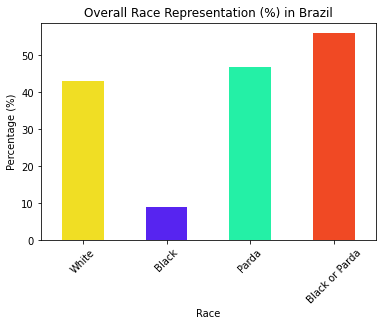

In [32]:
colours = list(islice(cycle(['#F0DE24','#5724F0', '#24F0A6', '#F04924']), None, 4))
g_pop_br = g_pop_geo.iloc[0]
columns_to_plot = g_pop_br[['p_Branca', 'p_Preta', 'p_Parda', 'p_Preta ou parda']]
fig, ax = plt.subplots()
columns_to_plot.plot(kind='bar', ax=ax, xlabel='Race', ylabel='Percentage (%)', color=colours)
ax.set_xticklabels(['White', 'Black', 'Parda', 'Black or Parda'], rotation=45)
plt.title("Overall Race Representation (%) in Brazil")
plt.show()

In [33]:
uni_race = pd.merge(uni, g_pop_geo, left_on='NM_UF', right_on='Grandes Regiões e Unidades da Federação')
uni_race["Max (%)"] = uni_race[['p_Branca', 'p_Preta', 'p_Parda']].max(axis=1).round(2)
uni_race["Maj Race"] = uni_race[['p_Branca', 'p_Preta', 'p_Parda']].idxmax(axis=1).str.replace('p_', '')

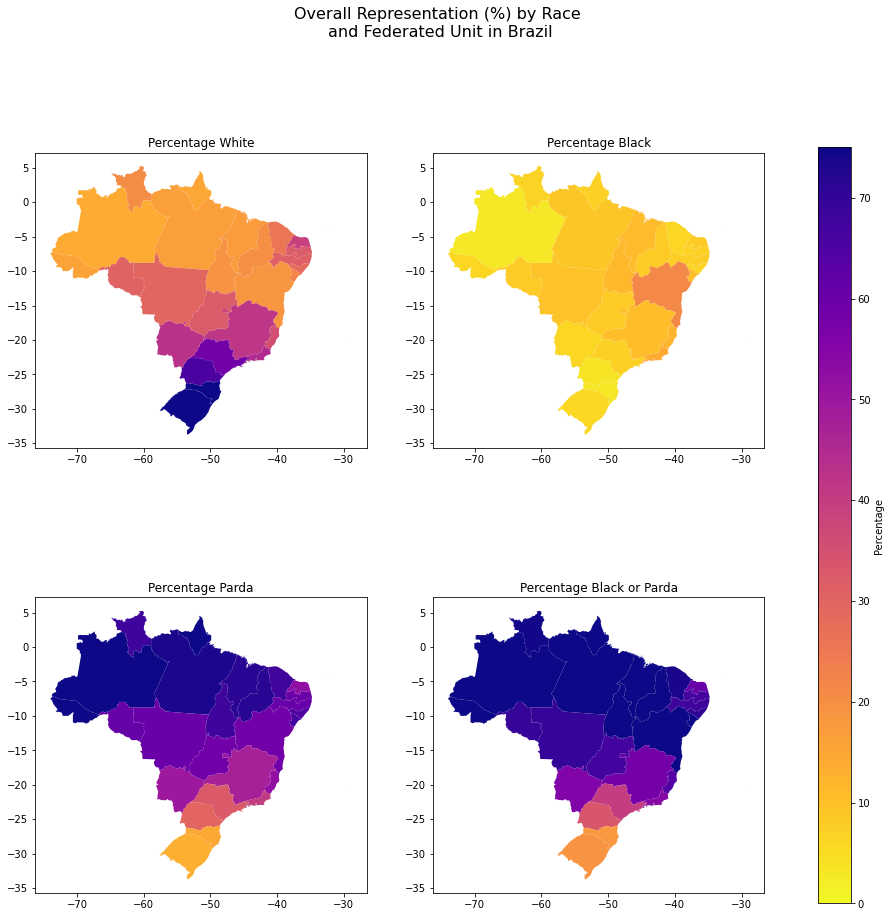

In [34]:
fig, ((ax1, ax2),(ax3, ax4)) = plt.subplots(2,2, figsize=(15, 15))

fig.suptitle("Overall Representation (%) by Race \nand Federated Unit in Brazil", fontsize=16)

# Normalize color scale to range
vmin, vmax = 0, 75
norm = mcolors.Normalize(vmin=vmin, vmax=vmax)

fig.subplots_adjust(right=0.8)

uni_race.plot(ax=ax1, column='p_Branca', cmap='plasma_r', norm=norm)
uni_race.plot(ax=ax2, column='p_Preta', cmap='plasma_r', norm=norm)
uni_race.plot(ax=ax3, column='p_Parda', cmap='plasma_r', norm=norm)
uni_race.plot(ax=ax4, column='p_Preta ou parda', cmap='plasma_r', norm=norm)

# Set titles for each subplot
ax1.set_title('Percentage White')
ax2.set_title('Percentage Black')
ax3.set_title('Percentage Parda')
ax4.set_title('Percentage Black or Parda')

# Add colorbar
sm = plt.cm.ScalarMappable(cmap='plasma_r', norm=norm)
cbar_ax = fig.add_axes([0.85, 0.15, 0.03, 0.7])
cbar = fig.colorbar(sm, cax=cbar_ax)
cbar.set_label('Percentage')

plt.show()

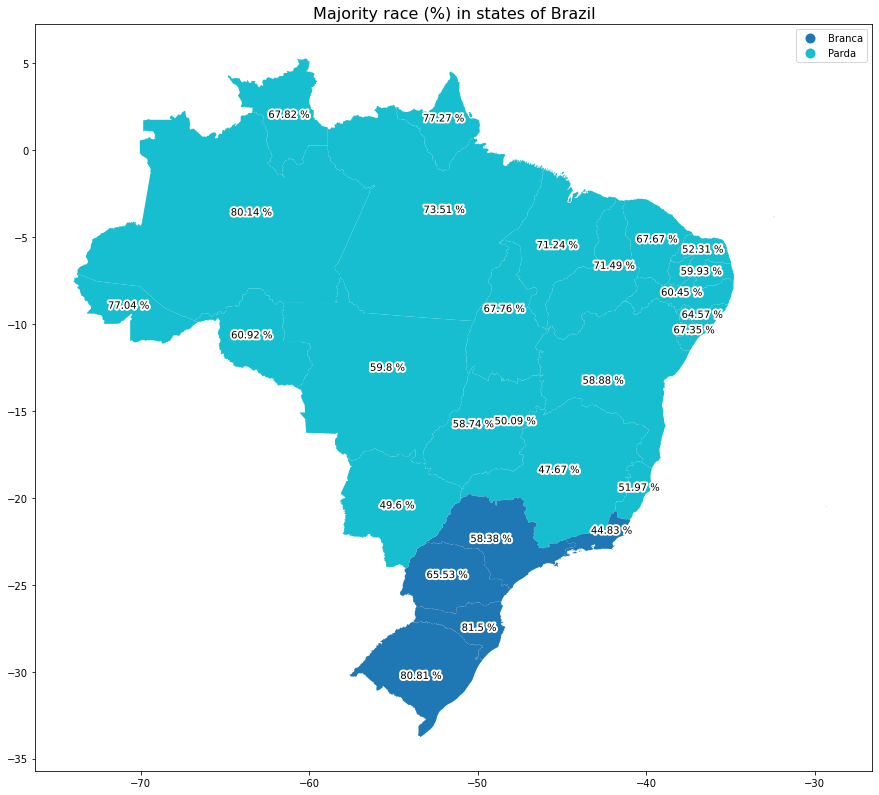

In [35]:
# Majority race in states of Brazil
uni_race.plot(column='Maj Race', legend=True, figsize=(15, 15))
plt.title("Majority race (%) in states of Brazil", fontsize=16)
for idx, row in uni_race.iterrows():   
    plt.annotate(text=str(row['Max (%)']) + ' %', xy=row['coords'], horizontalalignment='center', color='black', path_effects=[pe.withStroke(linewidth=4, foreground="white")])

### Historical Gold Mining in Brazil

[The gold mining industry in Brazil: A historical overview](https://www.sciencedirect.com/science/article/pii/S0169136822003134) examines the locations of historical gold mines in Brazil.

In [36]:
# Load tables from pdf
# https://www.sciencedirect.com/science/article/pii/S0169136822003134

# This study looked at the historical mining of Gold in Brazil
# The tables I used ended up being manually cleaned because tabula only slightly picked them up
daCosta_Rios = read_pdf(f + 'daCosta_Rios_AUMiningBR.pdf', pages='all', silent=True)

Failed to import jpype dependencies. Fallback to subprocess.
No module named 'jpype'


In [37]:
# This table had all historical major gold mines for Minas Gerais
# Can pull more from this if of interest
daCosta_Rios[4].head()

,Operation Period,Mine,Group,Ore Type,Place,State,Tonnes Au
0,1825–1856,Gongo Soco,Imperial Brazilian Mining Assoc.,4,Caeté,MG,13.26
1,1832–1844,Cata Branca,Brazilian Company Ltd,2,Itabirito,MG,1.18
2,1834–2006,Morro Velho,Saint John d’El Rey Mining Co. Ltd.,1,Nova Lima,MG,370.14
3,1834–1853,Cocais,National Brazilian Mining Assoc.,4,Barão de Cocais,MG,0.25
4,1847–1853,Água Quente,Imperial Brazilian Mining Assoc.,4,Barão de Cocais,MG,0.35


In [38]:
# Table 1. Super-large and large gold deposits
# This table was used to pull the States from which there was major historical gold production
daCosa_Rios_Tbl1 = pd.read_excel(f + 'daCosta_Rios_Tbl1.xlsx')
daCosa_Rios_Tbl1_sum = daCosa_Rios_Tbl1[['State', 'Accumulated Gold Production (tonnes)']].groupby(['State']).sum()
daCosa_Rios_Tbl1_sum = daCosa_Rios_Tbl1.join(daCosa_Rios_Tbl1_sum, 'State', lsuffix='_all', rsuffix='_sum')
daCosa_Rios_Tbl1_sum

,Type,Name,State,Accumulated Gold Production (tonnes)_all,Accumulated Gold Production (tonnes)_sum
0,Super-large gold deposits (Au production great...,Cuiabá,MG,196.22,1064.34
1,NaN,Morro Velho,MG,370.14,1064.34
2,NaN,Morro de Ouro,MG,371.35,1064.34
3,NaN,Crixás,GO,138.37,189.56
4,NaN,Fazenda Brasileiro,BA,101.38,173.97
5,NaN,Igarapé Bahia,PA,100.00,160.43
6,Large gold deposits (Au production between 40 ...,São Bento,MG,59.49,1064.34
7,NaN,Raposos,MG,67.14,1064.34
8,NaN,Chapada,GO,51.19,189.56
9,NaN,Jacobina,BA,72.59,173.97


In [39]:
# Gold production by Federated Unit and Century
daCosa_Rios_Tbl3 = pd.read_excel(f + 'daCosta_Rios_Tbl3.xlsx')
daCosa_Rios_Tbl3

,Province,Sec XIX,Sec XX,Sec XXI
0,Minas Gerais (Iron Quadrangle/QF),117.86,515.92,253.14
1,Minas Gerais,NaN,94.87,292.63
2,Goiás,NaN,55.84,167.77
3,Bahia,0.08,86.22,101.28
4,Mato Grosso,NaN,12.35,47.15
5,Pará,NaN,97.01,110.84
6,Amapá,NaN,23.27,44.31
7,Maranhão,NaN,NaN,12.58
8,South Region,NaN,3.81,8.58
9,Northeast (NE) Region,NaN,8.09,0.24


In [40]:
# Create subset shapefile of states relevant to historical gold production
hist_Au = daCosa_Rios_Tbl3['Province'].unique()
uni_hist_Au = uni.loc[uni['NM_UF'].isin(hist_Au)]
uni_hist_Au

,CD_UF,NM_UF,SIGLA_UF,NM_REGIAO,AREA_KM2,geometry,coords,colour
2,15,Pará,PA,Norte,1245870.704,"MULTIPOLYGON (((-48.97548 -0.19834, -48.97487 ...","(-51.993244521065925, -3.624690623999955)","[0.3509803921568627, 0.23194764145389815, 0.99..."
3,16,Amapá,AP,Norte,142470.762,"MULTIPOLYGON (((-51.04561 -0.05088, -51.05422 ...","(-52.02519124598603, 1.63441790400003)","[0.27254901960784317, 0.34972651120626114, 0.9..."
5,21,Maranhão,MA,Nordeste,329651.496,"MULTIPOLYGON (((-44.58680 -2.23341, -44.58696 ...","(-45.27819124057096, -5.655954034999954)","[0.11568627450980395, 0.5676747161445901, 0.95..."
13,29,Bahia,BA,Nordeste,564760.429,"MULTIPOLYGON (((-39.26447 -8.61413, -39.26341 ...","(-42.56171864264248, -13.4406347415)","[0.503921568627451, 0.9999810273487268, 0.7049..."
14,31,Minas Gerais,MG,Sudeste,586513.983,"POLYGON ((-42.51148 -14.98627, -42.50964 -14.9...","(-45.18576713252065, -18.578052808)","[0.5745098039215686, 0.9931586661366362, 0.664..."
22,51,Mato Grosso,MT,Centro-Oeste,903208.361,"POLYGON ((-56.07160 -17.17062, -56.07246 -17.1...","(-55.35598042687892, -12.69605331149995)","[1.0, 0.4622038835403133, 0.2379351950426188, ..."
23,52,Goiás,GO,Centro-Oeste,340242.859,"POLYGON ((-47.33502 -15.58733, -47.33512 -15.5...","(-50.2597455240585, -15.94665933299995)","[1.0, 0.3497265112062616, 0.17769096976026882,..."


In [41]:
# Create subset shapefile of states with large and super-large gold deposits
maj_Au = daCosa_Rios_Tbl1['State'].unique()
uni_maj_Au = uni.loc[uni['SIGLA_UF'].isin(maj_Au)]
uni_maj_Au

,CD_UF,NM_UF,SIGLA_UF,NM_REGIAO,AREA_KM2,geometry,coords,colour
2,15,Pará,PA,Norte,1245870.704,"MULTIPOLYGON (((-48.97548 -0.19834, -48.97487 ...","(-51.993244521065925, -3.624690623999955)","[0.3509803921568627, 0.23194764145389815, 0.99..."
3,16,Amapá,AP,Norte,142470.762,"MULTIPOLYGON (((-51.04561 -0.05088, -51.05422 ...","(-52.02519124598603, 1.63441790400003)","[0.27254901960784317, 0.34972651120626114, 0.9..."
13,29,Bahia,BA,Nordeste,564760.429,"MULTIPOLYGON (((-39.26447 -8.61413, -39.26341 ...","(-42.56171864264248, -13.4406347415)","[0.503921568627451, 0.9999810273487268, 0.7049..."
14,31,Minas Gerais,MG,Sudeste,586513.983,"POLYGON ((-42.51148 -14.98627, -42.50964 -14.9...","(-45.18576713252065, -18.578052808)","[0.5745098039215686, 0.9931586661366362, 0.664..."
23,52,Goiás,GO,Centro-Oeste,340242.859,"POLYGON ((-47.33502 -15.58733, -47.33512 -15.5...","(-50.2597455240585, -15.94665933299995)","[1.0, 0.3497265112062616, 0.17769096976026882,..."


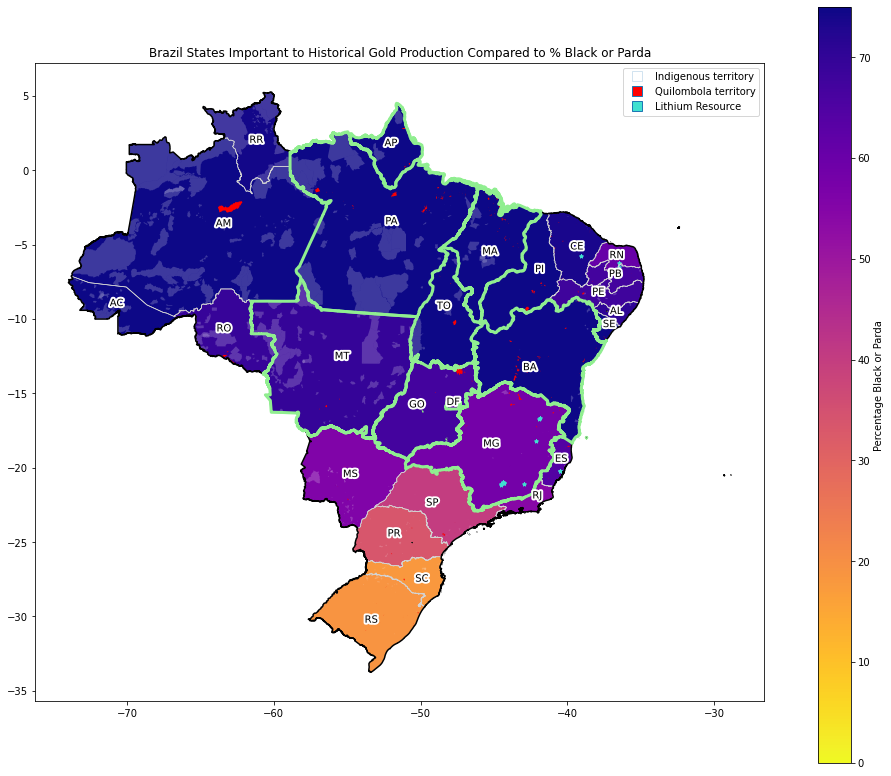

In [43]:
fig, ax = plt.subplots()

fig.set_figheight(15)
fig.set_figwidth(15)
fig.subplots_adjust(right=0.8)
uni_race.plot(ax=ax, column='p_Preta ou parda', cmap='plasma_r', norm=norm)
terr_indig.plot(ax=ax, color='white', label='Indigenous territory', alpha = 0.2)
terr_quilo.plot(ax=ax, color='red', label= 'Quilombola territory')
li_res.plot(ax=ax, marker='*', markersize=15, color= 'turquoise', label='Lithium Resource')
uni.boundary.plot(ax=ax, linewidth = 0.7, color= 'lightgrey')
br.boundary.plot(ax=ax, color='black')
uni_hist_Au.boundary.plot(ax=ax, linewidth=3, color='lightgreen') # column="SIGLA_UF"


for idx, row in uni.iterrows():   
    plt.annotate(text=str(row['SIGLA_UF']), xy=row['coords'], horizontalalignment='center', color='black', path_effects=[pe.withStroke(linewidth=4, foreground="white")])

ax.title.set_text('Brazil States Important to Historical Gold Production Compared to % Black or Parda')

# Add colorbar
sm = plt.cm.ScalarMappable(cmap='plasma_r', norm=norm)
cbar_ax = fig.add_axes([0.85, 0.15, 0.03, 0.7])
cbar = fig.colorbar(sm, cax=cbar_ax)
cbar.set_label('Percentage Black or Parda')

lines = [
    Line2D([0], [0], linestyle="none", marker="s", markersize=10, markerfacecolor=t.get_facecolor())
    for t in ax.collections
]
labels = [t.get_label() for t in ax.collections]

ax.legend(lines, labels)
plt.show()

A few things of note in the above map:
- States which were important to historical gold production, and thus had ties to slavery, are majority Black or Parda today.
- Quilombola territories (territories belonging to descendants of people who escaped slavery) are primarily located in or around the states important to historical gold production. This is possibly due to the historical ties between gold mining in Brazil and slavery. 
- Minas Gerais was one of the most important states for historical gold mining, and is the site of the majority of Brazil's lithium deposits. 

### Age / gender statistics

In [44]:
# Load general age table
col_names = ['Grupos de idade', 'Total (1 000 pessoas)', 'Branca', 'Preta', 'Parda', 'Preta ou parda', 'p_Branca', 'p_Preta', 'p_Parda', 'p_Preta ou parda']
g_pop_idad_fn = f + g + 'Tabela 1.2 (Pop_Idad).xls'
g_pop_idad = pd.read_excel(g_pop_idad_fn, names= col_names, skiprows=5).drop([18,19])


In [45]:
# General age table
# Show top five rows of data
g_pop_idad

,Grupos de idade,Total (1 000 pessoas),Branca,Preta,Parda,Preta ou parda,p_Branca,p_Preta,p_Parda,p_Preta ou parda
0,Total,212650.323424,91467.301523,19298.246299,99903.081546,119201.327844,43.013008,9.075108,46.979981,56.055089
1,0 a 4 anos,14657.283134,6520.813540,866.981466,7180.902621,8047.884087,44.488555,5.915022,48.992044,54.907066
2,5 a 9 anos,14643.442024,5804.819015,1008.174497,7716.325555,8724.500053,39.641083,6.884819,52.694753,59.579572
3,10 a 14 anos,14669.677206,5613.965491,1051.139251,7903.196648,8954.335899,38.269182,7.165388,53.874373,61.039761
4,15 a 19 anos,15412.473820,5902.892415,1342.827045,8045.635844,9388.462889,38.299448,8.712599,52.202106,60.914705
5,20 a 24 anos,17004.433037,6661.120423,1712.058229,8510.482218,10222.540446,39.172846,10.068305,50.048609,60.116914
6,25 a 29 anos,16958.002062,6711.877179,1763.166145,8295.117785,10058.283930,39.579410,10.397252,48.915655,59.312907
7,30 a 34 anos,17082.041066,7042.688321,1806.092141,8057.464856,9863.556997,41.228611,10.573046,47.169216,57.742263
8,35 a 39 anos,17070.155030,7272.147625,1773.972523,7896.871914,9670.844437,42.601532,10.392246,46.261278,56.653524
9,40 a 44 anos,15874.601017,6615.493988,1586.751528,7521.257779,9108.009307,41.673450,9.995536,47.379193,57.374729


In [46]:
# Load age and gender table
col_names = ['Sexo e grupos de idade', 'Total (1 000 pessoas)', 'p_Branca', 'p_Preta', 'p_Parda', 'p_Amarela', 'p_Indígena']
g_pop_sex_idad_fn = f + g + 'Tabela 1.3 (Por_Sex_Idad).xls'
g_pop_sex_idad = pd.read_excel(g_pop_sex_idad_fn, names=col_names, skiprows=5).drop([4, 10,11,12])

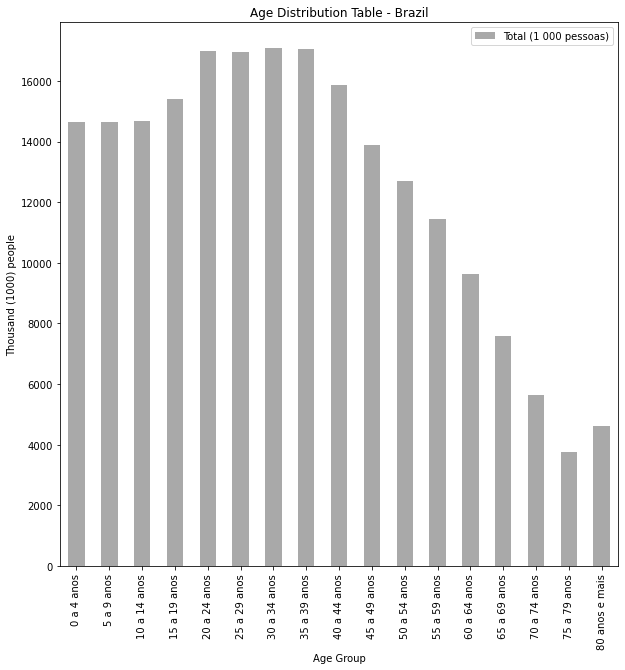

In [47]:
# Age distribution table
age = g_pop_idad[['Grupos de idade', 'Total (1 000 pessoas)']][1:]
age.set_index('Grupos de idade').plot(kind='bar', color='darkgrey', title='Age Distribution Table - Brazil', ylabel = 'Thousand (1000) people', xlabel='Age Group', figsize=(10,10))
plt.show()

In [48]:
# General age and gender table
g_pop_sex_idad

,Sexo e grupos de idade,Total (1 000 pessoas),p_Branca,p_Preta,p_Parda,p_Amarela,p_Indígena
0,Brasil,212650.323424,43.013008,9.075108,46.979981,0.594372,0.316586
1,Sexo,NaN,NaN,NaN,NaN,NaN,NaN
2,Homens,103945.651228,42.205962,9.267844,47.621761,0.567255,0.317144
3,Mulheres,108704.672196,43.784722,8.890809,46.366297,0.620301,0.316053
5,0 a 14 anos,43970.402364,40.799258,6.655148,51.854028,0.406746,0.261321
6,15 a 29 anos,49374.908919,39.039849,9.758097,50.331710,0.504499,0.342176
7,30 a 49 anos,63913.639121,42.148885,10.198349,46.699045,0.632909,0.307955
8,50 a 59 anos,24159.146011,45.967507,9.782967,43.104890,0.758938,0.349318
9,60 anos ou mais,31232.227010,51.893737,8.556170,38.391717,0.794441,0.346282


In [50]:
# Subset only ages from age and gender table
g_pop_group_idad = g_pop_sex_idad[4:] 
g_pop_group_idad

,Sexo e grupos de idade,Total (1 000 pessoas),p_Branca,p_Preta,p_Parda,p_Amarela,p_Indígena
5,0 a 14 anos,43970.402364,40.799258,6.655148,51.854028,0.406746,0.261321
6,15 a 29 anos,49374.908919,39.039849,9.758097,50.331710,0.504499,0.342176
7,30 a 49 anos,63913.639121,42.148885,10.198349,46.699045,0.632909,0.307955
8,50 a 59 anos,24159.146011,45.967507,9.782967,43.104890,0.758938,0.349318
9,60 anos ou mais,31232.227010,51.893737,8.556170,38.391717,0.794441,0.346282


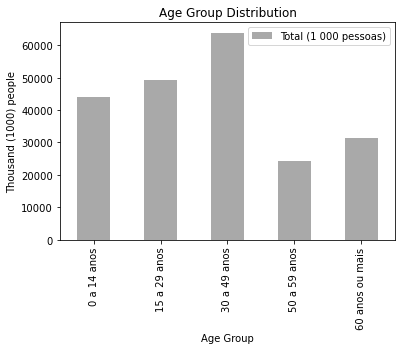

In [51]:
# Plot general age group distribution
g_pop_group_idad.plot.bar(x='Sexo e grupos de idade', y='Total (1 000 pessoas)', color='darkgrey', title='Age Group Distribution', xlabel='Age Group', ylabel='Thousand (1000) people')
plt.show()

In [52]:
# Age/ Sex rations between races
g_pop_sex = g_pop_sex_idad[2:4]
white = round(g_pop_sex['p_Branca'][2] / g_pop_sex['p_Branca'][3], 2)
Black = round(g_pop_sex['p_Preta'][2] / g_pop_sex['p_Preta'][3], 2)
Brown = round(g_pop_sex['p_Parda'][2] / g_pop_sex['p_Parda'][3], 2)
print('The ratio of white men to white women in Brazil is {}'.format(white))
print('The ratio of Black men to Black women in Brazil is {}'.format(Black))
print('The ratio of Brown men to Brown women in Brazil is {}'.format(Brown))

The ratio of white men to white women in Brazil is 0.96
The ratio of Black men to Black women in Brazil is 1.04
The ratio of Brown men to Brown women in Brazil is 1.03


### Income

In [53]:
# Tabela 2.5 - Average usual real income from the main job of people 
# aged 14 or over, employed in the reference week and in formal 
# and informal occupations, by color or race, according to the 
# Major Regions, the Federation Units and the Municipalities of 
# the Capitals - Brazil - 2021
col_names = ['Grandes Regiões, Unidades da Federação e Municípios das Capitais', 'fi_Total', 'fi_Branca', 'fi_Preta', 'fi_Parda', 'fi_Preta ou parda', 'f_Total', 'f_Branca', 'f_Preta', 'f_Parda', 'f_Preta ou parda', 'i_Total', 'i_Branca', 'i_Preta', 'i_Parda', 'i_Preta ou parda']
w_rend_form_geo_fn = f + w + 'Tabela 2.5 (Rend_Form_Geo).xls'
w_rend_form_geo = pd.read_excel(w_rend_form_geo_fn, names=col_names, skiprows=5).drop(0)[:60]

In [54]:
# Average usual real income by race (R$)
# Show top five rows of data
w_rend_form_geo.head()


,"Grandes Regiões, Unidades da Federação e Municípios das Capitais",fi_Total,fi_Branca,fi_Preta,fi_Parda,fi_Preta ou parda,f_Total,f_Branca,f_Preta,f_Parda,f_Preta ou parda,i_Total,i_Branca,i_Preta,i_Parda,i_Preta ou parda
1,Brasil,2405.758521,3098.914988,1764.399163,1813.586869,1804.419788,2950.648170,3526.191595,2200.076297,2343.946273,2315.894427,1542.971162,2157.095221,1175.605525,1182.067558,1180.931065
2,Norte,1812.330803,2477.968905,1594.682749,1657.891051,1651.111060,2586.987570,3339.416263,2309.993957,2372.072491,2365.634782,1210.883313,1613.273445,1102.055172,1133.218685,1129.794974
3,Rondônia,1998.084135,2209.917314,2052.663814,1872.589876,1891.016418,2316.812492,2530.350741,2677.889156,2154.433581,2204.592923,1534.985163,1712.373402,1295.525078,1468.469507,1449.187590
4,Porto Velho,2246.722705,2728.124723,2080.593716,2101.311005,2099.384651,2729.389646,3346.270110,2686.587277,2540.452636,2552.999819,1513.694467,1809.424248,1312.382777,1414.016755,1403.455959
5,Acre,1913.566986,2497.616416,1926.745276,1777.629536,1791.323731,2565.398976,3035.120614,2593.596736,2446.293283,2459.689327,1346.100164,1955.376613,1377.401652,1215.818347,1230.778691


In [55]:
# Merge real income by race with Federated Union layer
uni_fi_rend_form = pd.merge(uni, w_rend_form_geo, left_on='NM_UF', right_on='Grandes Regiões, Unidades da Federação e Municípios das Capitais').drop_duplicates('NM_UF')

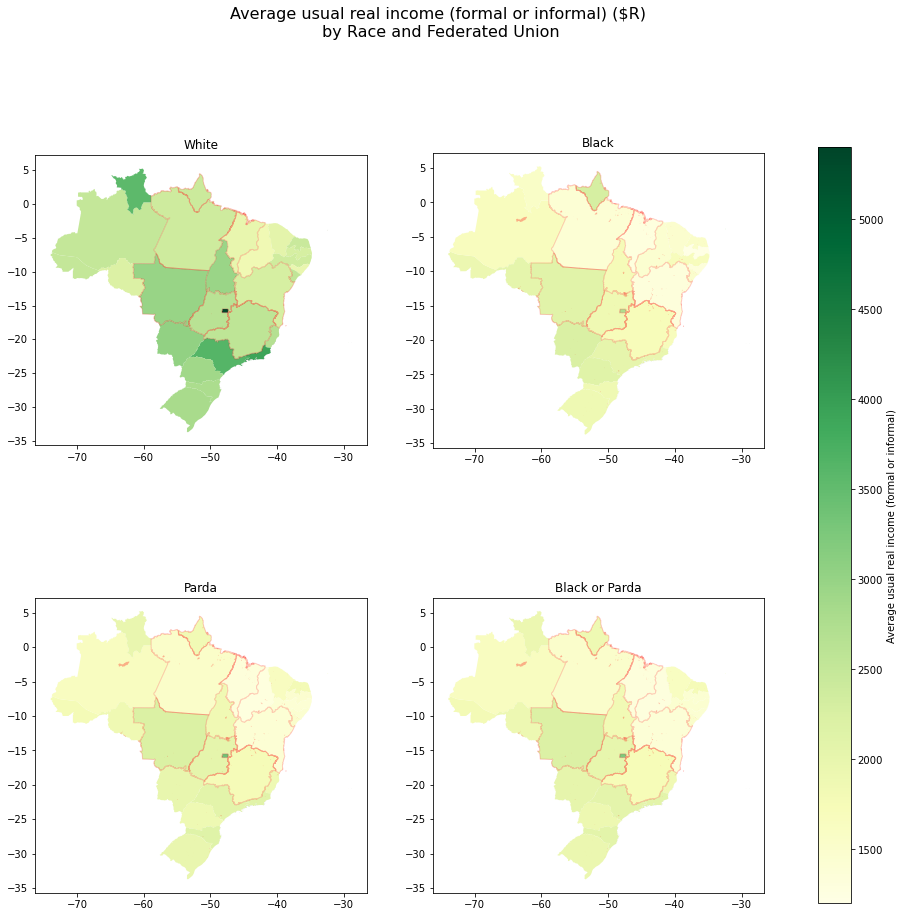

In [62]:
fig, ((ax1, ax2),(ax3, ax4)) = plt.subplots(2,2, figsize=(15, 15))

fig.suptitle('Average usual real income (formal or informal) ($R) \nby Race and Federated Union', fontsize=16)

# Normalize color scale to range
vmin, vmax = 1200, 5400
norm = mcolors.Normalize(vmin=vmin, vmax=vmax)

fig.subplots_adjust(right=0.8)

uni_fi_rend_form.plot(ax=ax1, column='fi_Branca', cmap='YlGn', norm=norm)
uni_hist_Au.boundary.plot(ax=ax1, linewidth=1, color='red',alpha=0.2)
uni_fi_rend_form.plot(ax=ax2, column='fi_Preta', cmap='YlGn', norm=norm)
uni_hist_Au.boundary.plot(ax=ax2, linewidth=1, color='red', alpha=0.2) 
terr_quilo.plot(ax=ax2, color='red', label= 'Quilombola territory', alpha=0.3)
uni_fi_rend_form.plot(ax=ax3, column='fi_Parda', cmap='YlGn', norm=norm)
uni_hist_Au.boundary.plot(ax=ax3, linewidth=1, color='red', alpha=0.2) 
terr_quilo.plot(ax=ax3, color='red', label= 'Quilombola territory', alpha=0.3)
uni_fi_rend_form.plot(ax=ax4, column='fi_Preta ou parda', cmap='YlGn', norm=norm)
uni_hist_Au.boundary.plot(ax=ax4, linewidth=1, color='red',alpha=0.2) 
terr_quilo.plot(ax=ax4, color='red', label= 'Quilombola territory', alpha=0.3)

# Set titles for each subplot
ax1.set_title('White')
ax2.set_title('Black')
ax3.set_title('Parda')
ax4.set_title('Black or Parda')

# Add colorbar
sm = plt.cm.ScalarMappable(cmap='YlGn', norm=norm)
cbar_ax = fig.add_axes([0.85, 0.15, 0.03, 0.7])
cbar = fig.colorbar(sm, cax=cbar_ax)
cbar.set_label('Average usual real income (formal or informal)')

plt.show()

States important to historical gold production were superimposed on the above maps. It's interesting to note that some of the lowest average incomes for Black people are in states which were important to historical gold production, and thus slavery. 

In [57]:
# Tabela 2.7 - Usual real average hourly earnings from the main job of 
# people aged 14 or over employed in the reference week, by level of 
# education, according to Major Regions and color or race - Brazil - 2021
col_names = ['Grandes Regiões e cor ou raça', 'Total', 'No education or incomplete elementary school', 'Complete primary or incomplete secondary education', 'Complete secondary education or incomplete higher education', 'Complete higher education']
w_rend_instr_geo_fn = f + w + 'Tabela 2.7 (Rend_Instr_Geo).xls'
w_rend_instr_geo = pd.read_excel(w_rend_instr_geo_fn, names=col_names, skiprows=8)[:34].dropna()
race = ['Total'] * 6 + ['White'] * 6 + ['Black'] * 6 + ['Brown'] * 6 + ['Black or Brown'] * 6
w_rend_instr_geo['Race'] = race

In [58]:
# Set index
w_rend_instr_geo = w_rend_instr_geo.set_index(['Race', 'Grandes Regiões e cor ou raça'])

In [59]:
# Reshape data
w_rend_instr_all = w_rend_instr_geo.transpose()['Total'].transpose()
w_rend_instr_white = w_rend_instr_geo.transpose()['White'].transpose()
w_rend_instr_black = w_rend_instr_geo.transpose()['Black'].transpose()
w_rend_instr_brown = w_rend_instr_geo.transpose()['Brown'].transpose()
w_rend_instr_blackbrown = w_rend_instr_geo.transpose()['Black or Brown'].transpose()

In [60]:
# Join real average hourly earnings by race data to region layer
reg_rend_instr_white = pd.merge(regiao, w_rend_instr_white, left_on='NM_REGIAO', right_on='Grandes Regiões e cor ou raça')
reg_rend_instr_black = pd.merge(regiao, w_rend_instr_black, left_on='NM_REGIAO', right_on='Grandes Regiões e cor ou raça')
reg_rend_instr_brown = pd.merge(regiao, w_rend_instr_brown, left_on='NM_REGIAO', right_on='Grandes Regiões e cor ou raça')
reg_rend_instr_blackbrown = pd.merge(regiao, w_rend_instr_blackbrown, left_on='NM_REGIAO', right_on='Grandes Regiões e cor ou raça')


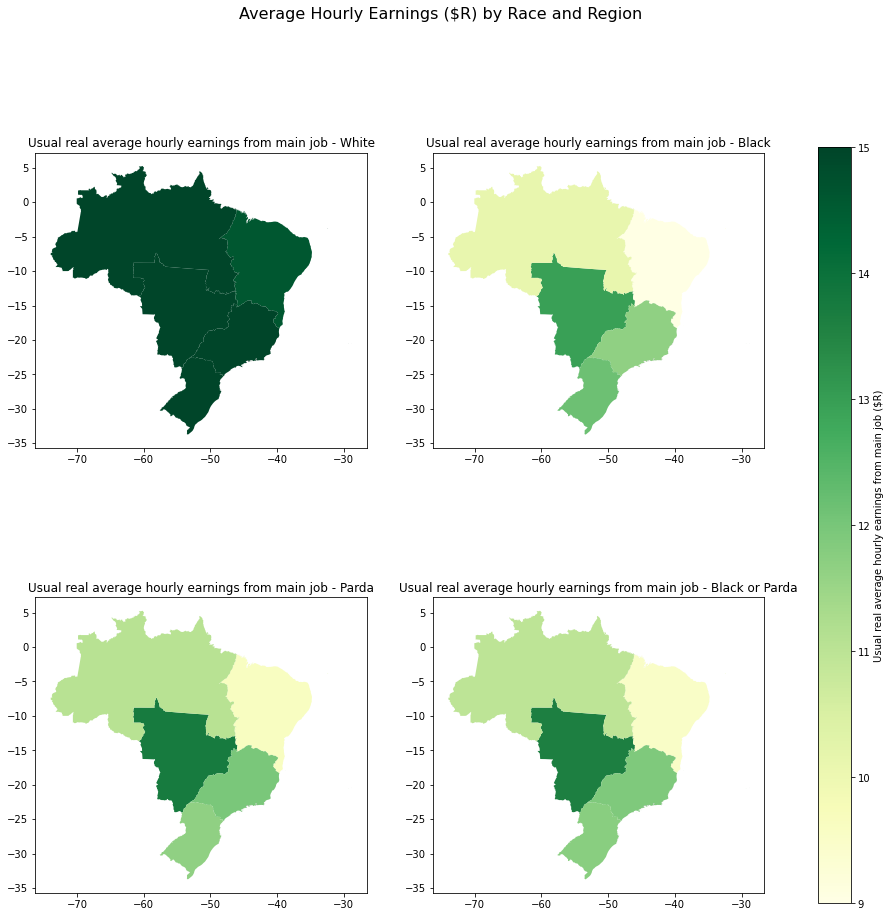

In [61]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 15))

fig.suptitle('Average Hourly Earnings ($R) by Race and Region', fontsize=16)

# Normalize color scale to range
vmin, vmax = 9, 15
norm = mcolors.Normalize(vmin=vmin, vmax=vmax)

reg_rend_instr_white.plot(ax=ax1, column='Total', cmap='YlGn', norm=norm)
reg_rend_instr_black.plot(ax=ax2, column='Total', cmap='YlGn', norm=norm)
reg_rend_instr_brown.plot(ax=ax3, column='Total', cmap='YlGn', norm=norm)
reg_rend_instr_blackbrown.plot(ax=ax4, column='Total', cmap='YlGn', norm=norm)

# Set titles for each subplot
ax1.set_title('Usual real average hourly earnings from main job - White')
ax2.set_title('Usual real average hourly earnings from main job - Black')
ax3.set_title('Usual real average hourly earnings from main job - Parda')
ax4.set_title('Usual real average hourly earnings from main job - Black or Parda')

# Add colorbar
sm = plt.cm.ScalarMappable(cmap='YlGn', norm=norm)
cbar_ax = fig.add_axes([0.85, 0.15, 0.03, 0.7])
cbar = fig.colorbar(sm, cax=cbar_ax)
cbar.set_label('Usual real average hourly earnings from main job ($R)')

# Display the plot
plt.subplots_adjust(right=0.80)  
plt.show()

White people make significantly more per hour, on average, than Black or Brown people in Brazil.

In [63]:
# Tabela 2.9 - Percentage distribution of the population, by classes of 
# percentage of people in increasing order of real monthly household 
# income per capita, and color or race, according to the Major Regions 
# and Federation Units - Brazil - 2021
w_rend_percent_geo_fn = f + w + 'Tabela 2.9 (Rend_Percent_10_Geo).xls'
w_rend_percent_geo = pd.read_excel(w_rend_percent_geo_fn, header=[3,4])[1:33]


In [64]:
# View first five rows of data
w_rend_percent_geo.head()

Unnamed: 0_level_0      Total                                      \
  Unnamed: 0_level_1     Branca     Preta      Parda Preta ou parda   
1             Brasil  43.018616  9.069717  46.979444      56.049161   
2              Norte  17.654986  7.474430  73.418406      80.892836   
3           Rondônia  30.216115  8.235032  60.920943      69.155975   
4               Acre  15.589286  6.035291  77.049543      83.084834   
5           Amazonas  14.345464  3.019722  80.132715      83.152437   

  Among the 10% with lowest income                                       \
                            Branca      Preta      Parda Preta ou parda   
1                        24.993870   9.691766  64.397231      74.088997   
2                        10.160639   6.729632  80.915616      87.645247   
3                        21.807912  23.442970  54.506677      77.949647   
4                         8.938424   4.533426  84.323390      88.856815   
5                         8.463725   2.534752  84.118481      86.653233   

  Among the 10% with highest income                                      
                             Branca     Preta      Parda Preta ou parda  
1                         70.518035  4.257801  23.469955      27.727756  
2                         31.158451  6.542550  60.632850      67.175400  
3                         41.074859  5.512513  52.675396      58.187909  
4                         28.229582  5.619347  65.563637      71.182984  
5                         26.496434  3.126043  67.825495      70.951538

In [65]:
# Subset data for those among the 10% with lowest income
low_10 = w_rend_percent_geo[['Unnamed: 0_level_0', 'Among the 10% with lowest income']]
low_10.columns = low_10.columns.droplevel(0)
regiao_low10 = pd.merge(regiao, low_10, left_on='NM_REGIAO', right_on='Unnamed: 0_level_1')
regiao_low10["coords"]= regiao_low10["geometry"].apply(lambda x: x.representative_point().coords[:])
regiao_low10["coords"] = [coords[0] for coords in regiao_low10["coords"]]
uni_low10 = pd.merge(uni, low_10, left_on='NM_UF', right_on='Unnamed: 0_level_1')
uni_low10["coords"]= uni_low10["geometry"].apply(lambda x: x.representative_point().coords[:])
uni_low10["coords"] = [coords[0] for coords in uni_low10["coords"]]

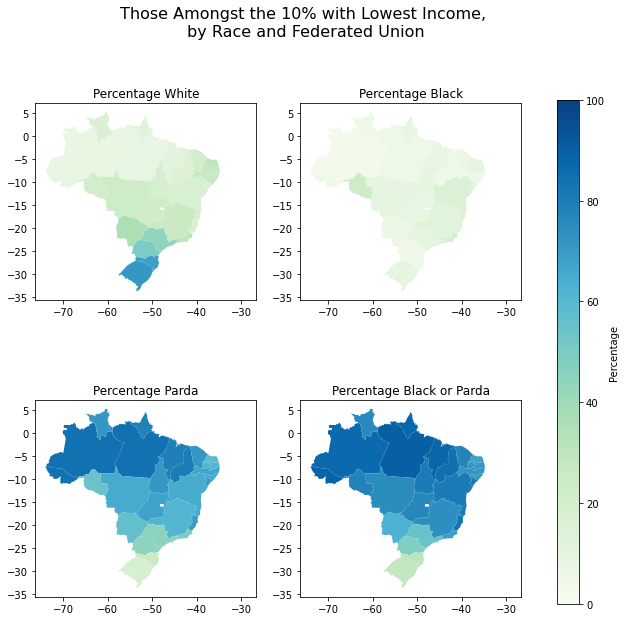

In [66]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(10, 10))

fig.suptitle('Those Amongst the 10% with Lowest Income, \nby Race and Federated Union', fontsize=16)

# Normalize color scale to range 0-100
vmin, vmax = 0, 100
norm = mcolors.Normalize(vmin=vmin, vmax=vmax)

fig.subplots_adjust(right=0.8)

uni_low10.plot(ax=ax1, column='Branca', cmap='GnBu', norm=norm)
uni_low10.plot(ax=ax2, column='Preta', cmap='GnBu', norm=norm)
uni_low10.plot(ax=ax3, column='Parda', cmap='GnBu', norm=norm)
uni_low10.plot(ax=ax4, column='Preta ou parda', cmap='GnBu', norm=norm)

# Set titles for each subplot
ax1.set_title('Percentage White')
ax2.set_title('Percentage Black')
ax3.set_title('Percentage Parda')
ax4.set_title('Percentage Black or Parda')

# Add colorbar
sm = plt.cm.ScalarMappable(cmap='GnBu', norm=norm)
cbar_ax = fig.add_axes([0.85, 0.15, 0.03, 0.7])
cbar = fig.colorbar(sm, cax=cbar_ax)
cbar.set_label('Percentage')

plt.show()

In [67]:
# Subset data for those among the 10% with highest income
high_10 = w_rend_percent_geo[['Unnamed: 0_level_0', 'Among the 10% with highest income']]
high_10.columns = high_10.columns.droplevel(0)
regiao_high10 = pd.merge(regiao, high_10, left_on='NM_REGIAO', right_on='Unnamed: 0_level_1')
regiao_high10["coords"]= regiao_high10["geometry"].apply(lambda x: x.representative_point().coords[:])
regiao_high10["coords"] = [coords[0] for coords in regiao_high10["coords"]]
uni_high10 = pd.merge(uni, high_10, left_on='NM_UF', right_on='Unnamed: 0_level_1')
uni_high10["coords"]= uni_high10["geometry"].apply(lambda x: x.representative_point().coords[:])
uni_high10["coords"] = [coords[0] for coords in uni_high10["coords"]]

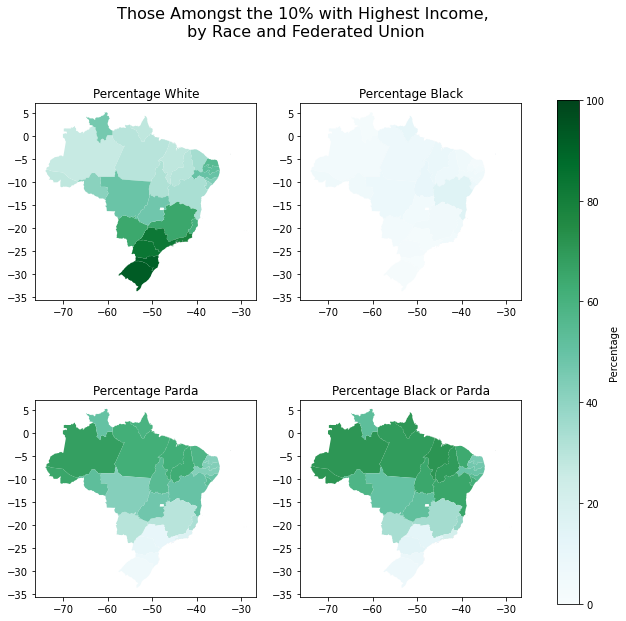

In [68]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(10, 10))

fig.suptitle('Those Amongst the 10% with Highest Income, \nby Race and Federated Union', fontsize=16)

# Normalize color scale to range 0-100
vmin, vmax = 0, 100
norm = mcolors.Normalize(vmin=vmin, vmax=vmax)

fig.subplots_adjust(right=0.8)

uni_high10.plot(ax=ax1, column='Branca', cmap='BuGn', norm=norm)
uni_high10.plot(ax=ax2, column='Preta', cmap='BuGn', norm=norm)
uni_high10.plot(ax=ax3, column='Parda', cmap='BuGn', norm=norm)
uni_high10.plot(ax=ax4, column='Preta ou parda', cmap='BuGn', norm=norm)

# Set titles for each subplot
ax1.set_title('Percentage White')
ax2.set_title('Percentage Black')
ax3.set_title('Percentage Parda')
ax4.set_title('Percentage Black or Parda')

# Add colorbar
sm = plt.cm.ScalarMappable(cmap='BuGn', norm=norm)
cbar_ax = fig.add_axes([0.85, 0.15, 0.03, 0.7])
cbar = fig.colorbar(sm, cax=cbar_ax)
cbar.set_label('Percentage')

plt.show()

In [69]:
# Tabela 2.10 - Percentage distribution of the population, by Major 
# Regions and color or race, according to the percentage classes of 
# people in increasing order of real monthly household income per 
# capita - Brazil - 2021
w_rend_pecent_geo_fn = f + w + 'Tabela 2.10 (Rend_Pecent_Geo).xls'
w_rend_pecent_geo = pd.read_excel(w_rend_pecent_geo_fn, header=[3,4])[1:22]

In [70]:
# Subset data distribution of population data by percent class of monthly income for only Brazil
w_rend_pecent_geo_br = w_rend_pecent_geo[['Unnamed: 0_level_0', 'Brasil']].iloc[1:11]
w_rend_pecent_geo_br = w_rend_pecent_geo_br.set_index('Unnamed: 0_level_0')
w_rend_pecent_geo_br.columns = w_rend_pecent_geo_br.columns.droplevel(0)
w_rend_pecent_geo_br['Level'] = [i[0] for i in w_rend_pecent_geo_br.index]
w_rend_pecent_geo_br = w_rend_pecent_geo_br.set_index('Level')

In [71]:
# Distribution of population data by percent class of monthly income for only Brazil
w_rend_pecent_geo_br

,Branca,Preta,Parda,Preta ou parda
Level,,,,
Até 10%,5.808273,10.682653,13.703429,13.214615
Mais de 10% até 20%,6.213344,11.778184,13.189561,12.961176
Mais de 20% até 30%,7.018586,13.000377,12.160454,12.296368
Mais de 30% até 40%,8.208522,11.558240,11.365632,11.396799
Mais de 40% até 50%,9.008768,10.785293,10.798096,10.796024
Mais de 50% até 60%,10.012458,11.264321,9.771375,10.012959
Mais de 60% até 70%,10.948669,9.639848,9.284631,9.342111
Mais de 70% até 80%,12.274797,9.508351,7.991529,8.236977
Mais de 80% até 90%,14.113670,7.088075,6.739359,6.795787


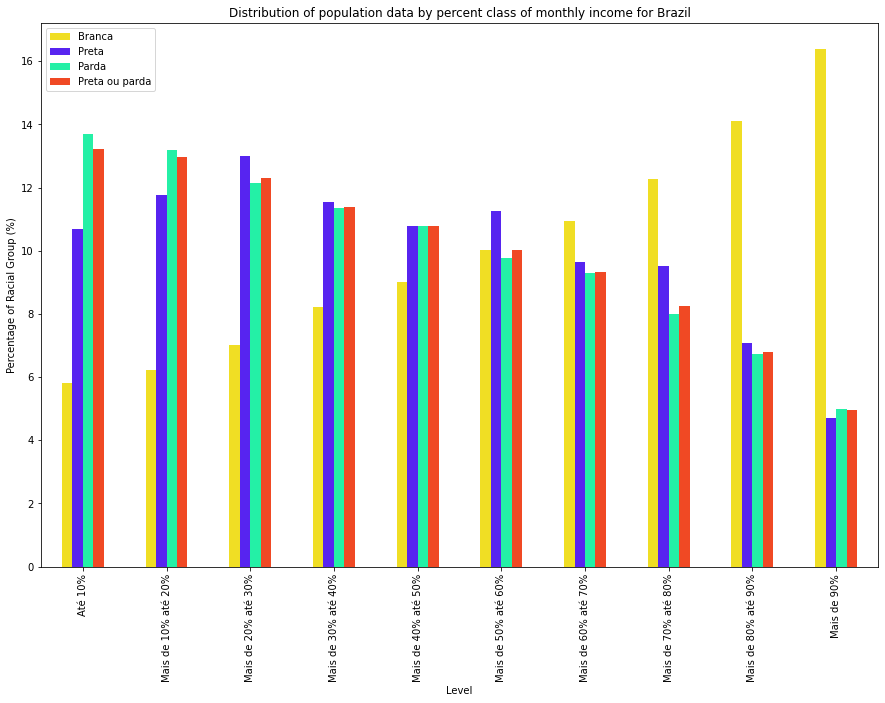

In [72]:
# Distribution of population data by percent class of monthly income for Brazil
colours = list(islice(cycle(['#F0DE24','#5724F0', '#24F0A6', '#F04924']), None, 4))
ax = w_rend_pecent_geo_br.plot.bar(figsize=(15,10), title= 'Distribution of population data by percent class of monthly income for Brazil', color=colours, ylabel='Percentage of Racial Group (%)')
plt.show()

The above graph is particularly stark in displaying what appears to be an inverse relationship between white and racialized wealth in Brazil.

In [73]:
#Norte

w_rend_pecent_geo_n = w_rend_pecent_geo[['Unnamed: 0_level_0', 'Norte']].iloc[1:11]
w_rend_pecent_geo_n = w_rend_pecent_geo_n.set_index('Unnamed: 0_level_0')
w_rend_pecent_geo_n.columns = w_rend_pecent_geo_n.columns.droplevel(0)
w_rend_pecent_geo_n['Level'] = [i[0] for i in w_rend_pecent_geo_n.index]
w_rend_pecent_geo_n = w_rend_pecent_geo_n.set_index('Level')

# Nordeste

w_rend_pecent_geo_ne = w_rend_pecent_geo[['Unnamed: 0_level_0', 'Nordeste']].iloc[1:11]
w_rend_pecent_geo_ne = w_rend_pecent_geo_ne.set_index('Unnamed: 0_level_0')
w_rend_pecent_geo_ne.columns = w_rend_pecent_geo_ne.columns.droplevel(0)
w_rend_pecent_geo_ne['Level'] = [i[0] for i in w_rend_pecent_geo_ne.index]
w_rend_pecent_geo_ne = w_rend_pecent_geo_ne.set_index('Level')

# Sudeste

w_rend_pecent_geo_se = w_rend_pecent_geo[['Unnamed: 0_level_0', 'Sudeste']].iloc[1:11]
w_rend_pecent_geo_se = w_rend_pecent_geo_se.set_index('Unnamed: 0_level_0')
w_rend_pecent_geo_se.columns = w_rend_pecent_geo_se.columns.droplevel(0)
w_rend_pecent_geo_se['Level'] = [i[0] for i in w_rend_pecent_geo_se.index]
w_rend_pecent_geo_se = w_rend_pecent_geo_se.set_index('Level')

# Sul

w_rend_pecent_geo_s = w_rend_pecent_geo[['Unnamed: 0_level_0', 'Sul']].iloc[1:11]
w_rend_pecent_geo_s = w_rend_pecent_geo_s.set_index('Unnamed: 0_level_0')
w_rend_pecent_geo_s.columns = w_rend_pecent_geo_s.columns.droplevel(0)
w_rend_pecent_geo_s['Level'] = [i[0] for i in w_rend_pecent_geo_s.index]
w_rend_pecent_geo_s = w_rend_pecent_geo_s.set_index('Level')

# Centro-Oeste

w_rend_pecent_geo_co = w_rend_pecent_geo[['Unnamed: 0_level_0', 'Centro-Oeste']].iloc[1:11]
w_rend_pecent_geo_co = w_rend_pecent_geo_co.set_index('Unnamed: 0_level_0')
w_rend_pecent_geo_co.columns = w_rend_pecent_geo_co.columns.droplevel(0)
w_rend_pecent_geo_co['Level'] = [i[0] for i in w_rend_pecent_geo_co.index]
w_rend_pecent_geo_co = w_rend_pecent_geo_co.set_index('Level')


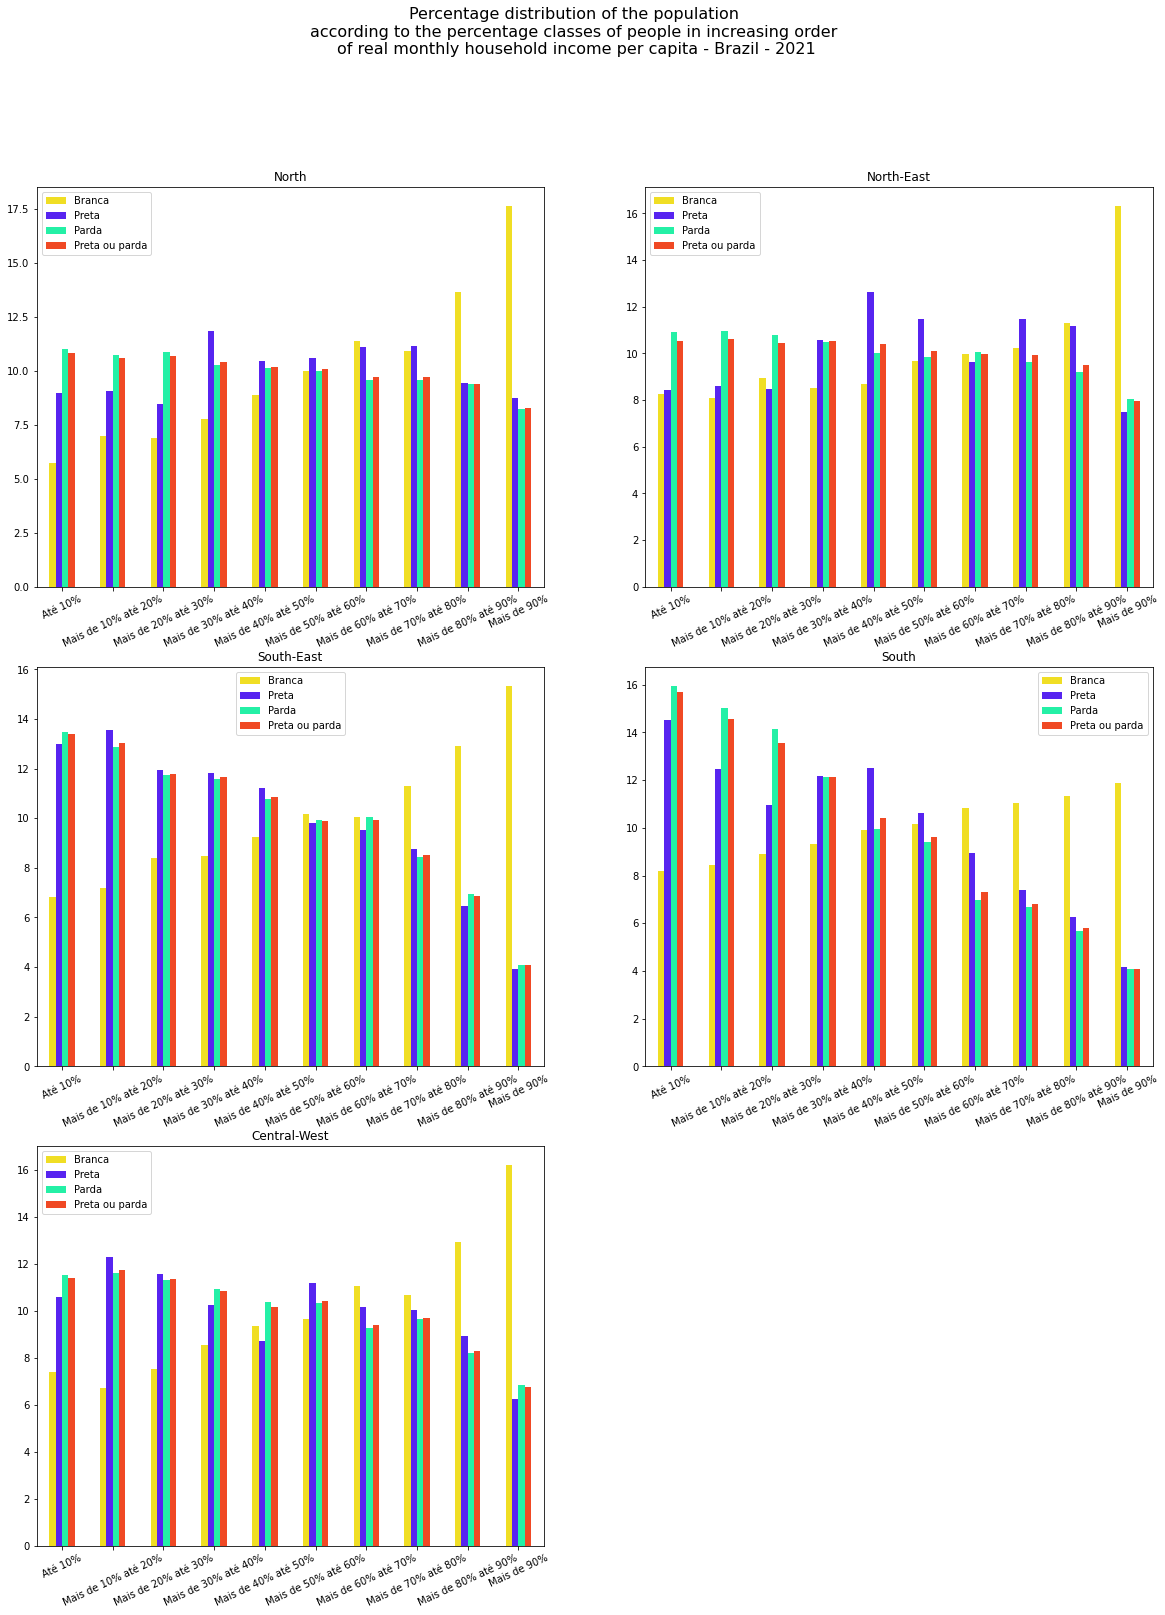

In [74]:
colours = list(islice(cycle(['#F0DE24','#5724F0', '#24F0A6', '#F04924']), None, 4))

fig, ((ax1, ax2),(ax3, ax4), (ax5, ax6)) = plt.subplots(3,2, figsize=(20, 25))
ax6.set_visible(False)

fig.suptitle('Percentage distribution of the population \naccording to the percentage classes of people in increasing order \nof real monthly household income per capita - Brazil - 2021', fontsize=16)

w_rend_pecent_geo_n.plot.bar(ax=ax1, title="North", xlabel="", color=colours)
w_rend_pecent_geo_ne.plot.bar(ax=ax2, title="North-East", xlabel="", color=colours)
w_rend_pecent_geo_se.plot.bar(ax=ax3, title="South-East", xlabel="", color=colours)
w_rend_pecent_geo_s.plot.bar(ax=ax4, title="South", xlabel="", color=colours)
w_rend_pecent_geo_co.plot.bar(ax=ax5, title="Central-West", xlabel="", color=colours)

ax1_lbl = ax1.get_xticklabels()

plt.setp(ax1_lbl, rotation=25)
ax2_lbl = ax2.get_xticklabels()
plt.setp(ax2_lbl, rotation=25)
ax3_lbl = ax3.get_xticklabels()
plt.setp(ax3_lbl, rotation=25)
ax4_lbl = ax4.get_xticklabels()
plt.setp(ax4_lbl, rotation=25)
ax5_lbl = ax5.get_xticklabels()
plt.setp(ax5_lbl, rotation=25)

plt.show()

### Violence

In [75]:
# Tabela 5.3 - Percentage of students aged 13 to 17 who did not attend 
# school due to lack of security on the home-school route or at school 
# in the 30 days prior to the survey, by color or race, according to the 
# Major Regions and Federation Units - Brazil - 2019
col_names = ['Area', 'Total', 'Branca', 'Preta', 'Parda', 'Preta ou parda']
v_violdesloc_geo_fn = f + v + 'Tabela 5.3 (ViolDesloc_Geo).xls'
v_violdesloc_geo = pd.read_excel(v_violdesloc_geo_fn, names=col_names, skiprows=7)[:33]

In [76]:
uni_violdesloc = pd.merge(uni, v_violdesloc_geo, left_on='NM_UF', right_on='Area')

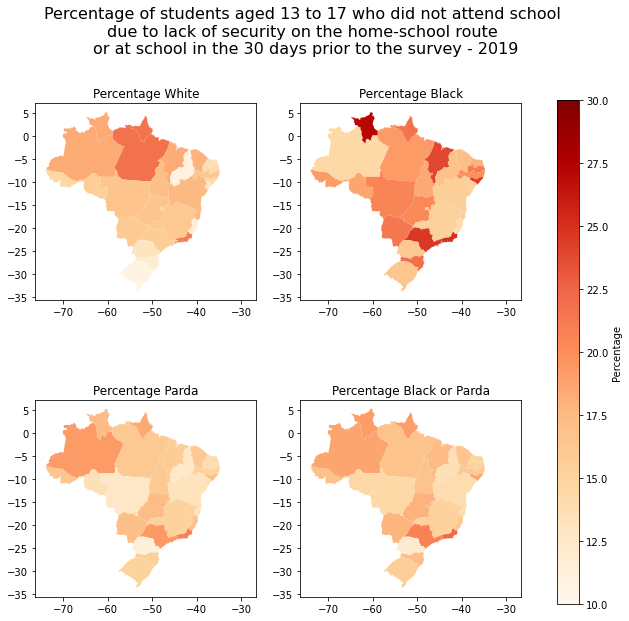

In [77]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(10, 10))

fig.suptitle('Percentage of students aged 13 to 17 who did not attend school \ndue to lack of security on the home-school route \nor at school in the 30 days prior to the survey - 2019', fontsize=16)

# Normalize color scale to range 0-100
vmin, vmax = 10, 30
norm = mcolors.Normalize(vmin=vmin, vmax=vmax)

fig.subplots_adjust(right=0.8)

uni_violdesloc.plot(ax=ax1, column='Branca', cmap='OrRd', norm=norm)
uni_violdesloc.plot(ax=ax2, column='Preta', cmap='OrRd', norm=norm)
uni_violdesloc.plot(ax=ax3, column='Parda', cmap='OrRd', norm=norm)
uni_violdesloc.plot(ax=ax4, column='Preta ou parda', cmap='OrRd', norm=norm)

# Set titles for each subplot
ax1.set_title('Percentage White')
ax2.set_title('Percentage Black')
ax3.set_title('Percentage Parda')
ax4.set_title('Percentage Black or Parda')

# Add colorbar
sm = plt.cm.ScalarMappable(cmap='OrRd', norm=norm)
cbar_ax = fig.add_axes([0.85, 0.15, 0.03, 0.7])
cbar = fig.colorbar(sm, cax=cbar_ax)
cbar.set_label('Percentage')

plt.show()

In [78]:
# Tabela 5.4 - Percentage of schoolchildren aged 13 to 17 who 
# were involved in a fight in which someone used a sharp weapon in the 
# 30 days prior to the survey, by color or race, according to the 
# administrative dependency of the school, the Major Regions and the 
# Federation Units - Brazil - 2019

col_names = ['Area', 'Total', 'Branca', 'Preta', 'Parda', 'Preta ou parda']
v_violarma_geo_fn = f + v + 'Tabela 5.4 (ViolArma_Geo).xls'
v_violarma_geo = pd.read_excel(v_violarma_geo_fn, names=col_names, skiprows=7)[:37]

In [79]:
v_violarma_geo.head()

,Area,Total,Branca,Preta,Parda,Preta ou parda
0,Brasil,4.811240,3.995054,7.257405,4.520183,5.176367
1,Dependência administrativa,NaN,NaN,NaN,NaN,NaN
2,Pública,5.123814,4.483815,7.433845,4.662796,5.339809
3,Privada,2.970560,2.322826,5.216285,3.268877,3.652371
4,Grandes Regiões e Unidades da Federação,NaN,NaN,NaN,NaN,NaN


In [80]:
uni_violarma = pd.merge(uni, v_violarma_geo, left_on='NM_UF', right_on='Area')

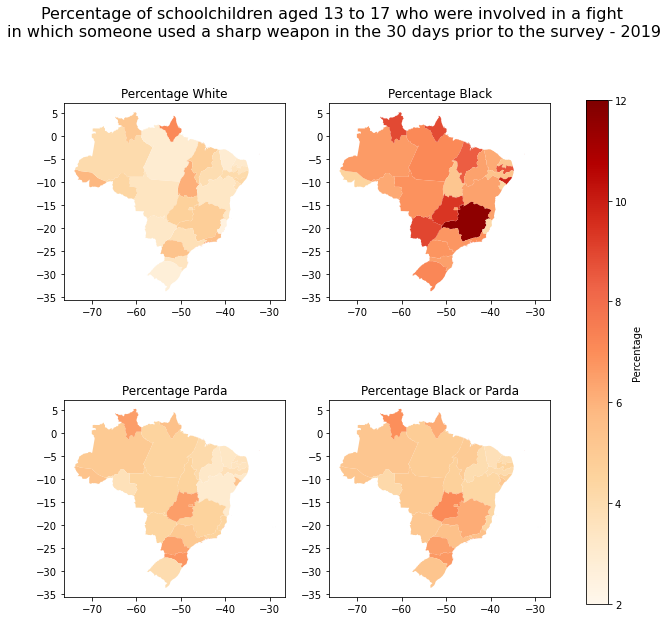

In [81]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(10, 10))

fig.suptitle('Percentage of schoolchildren aged 13 to 17 who were involved in a fight \nin which someone used a sharp weapon in the 30 days prior to the survey - 2019', fontsize=16)

# Normalize color scale to range 0-100
vmin, vmax = 2, 12
norm = mcolors.Normalize(vmin=vmin, vmax=vmax)

fig.subplots_adjust(right=0.8)

uni_violarma.plot(ax=ax1, column='Branca', cmap='OrRd', norm=norm)
uni_violarma.plot(ax=ax2, column='Preta', cmap='OrRd', norm=norm)
uni_violarma.plot(ax=ax3, column='Parda', cmap='OrRd', norm=norm)
uni_violarma.plot(ax=ax4, column='Preta ou parda', cmap='OrRd', norm=norm)

# Set titles for each subplot
ax1.set_title('Percentage White')
ax2.set_title('Percentage Black')
ax3.set_title('Percentage Parda')
ax4.set_title('Percentage Black or Parda')

# Add colorbar
sm = plt.cm.ScalarMappable(cmap='OrRd', norm=norm)
cbar_ax = fig.add_axes([0.85, 0.15, 0.03, 0.7])
cbar = fig.colorbar(sm, cax=cbar_ax)
cbar.set_label('Percentage')

plt.show()

In [82]:
# Tabela 5.6 - Rate of deaths from undetermined causes in relation to the 
# total number of deaths from external causes, by color or race, according 
# to the Major Regions and Federation Units - Brazil - 2020

col_names = ['Area', 'Total', 'Branca', 'Preta', 'Parda', 'Preta ou parda']
v_tx_obit_geo_fn = f + v + 'Tabela 5.6 (Tx_Obit_Geo).xls'
v_tx_obit_geo = pd.read_excel(v_tx_obit_geo_fn, names=col_names, skiprows=5)[:33]

In [83]:
v_tx_obit_geo.head()

,Area,Total,Branca,Preta,Parda,Preta ou parda
0,Brasil,9.612567,10.940366,10.405889,8.497457,8.709956
1,Norte,3.934791,4.567600,5.255474,3.643955,3.742315
2,Rondônia,6.168360,5.922551,6.097561,6.309524,6.290672
3,Acre,2.516779,0.000000,0.000000,2.083333,2.044990
4,Amazonas,1.317716,1.388889,2.777778,1.338091,1.360843


In [84]:
uni_tx_obit = pd.merge(uni, v_tx_obit_geo, left_on='NM_UF', right_on='Area')

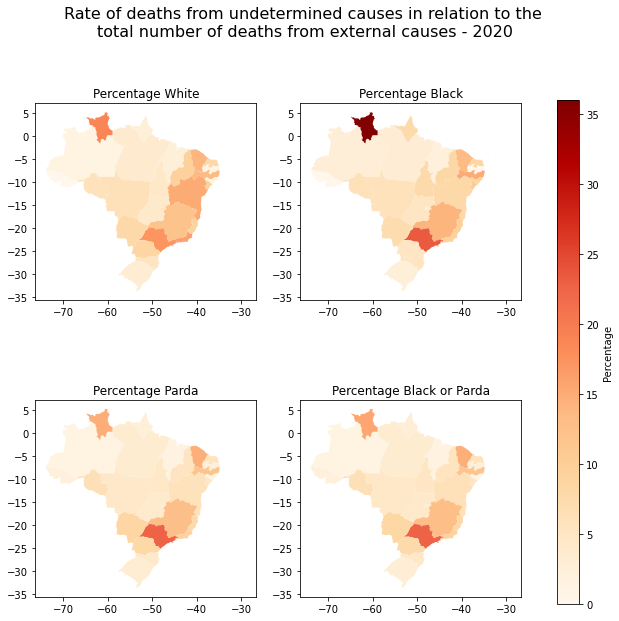

In [85]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(10, 10))

fig.suptitle('Rate of deaths from undetermined causes in relation to the \ntotal number of deaths from external causes - 2020', fontsize=16)

# Normalize color scale to range 0-100
vmin, vmax = 0, 36
norm = mcolors.Normalize(vmin=vmin, vmax=vmax)

fig.subplots_adjust(right=0.8)

uni_tx_obit.plot(ax=ax1, column='Branca', cmap='OrRd', norm=norm)
uni_tx_obit.plot(ax=ax2, column='Preta', cmap='OrRd', norm=norm)
uni_tx_obit.plot(ax=ax3, column='Parda', cmap='OrRd', norm=norm)
uni_tx_obit.plot(ax=ax4, column='Preta ou parda', cmap='OrRd', norm=norm)

# Set titles for each subplot
ax1.set_title('Percentage White')
ax2.set_title('Percentage Black')
ax3.set_title('Percentage Parda')
ax4.set_title('Percentage Black or Parda')

# Add colorbar
sm = plt.cm.ScalarMappable(cmap='OrRd', norm=norm)
cbar_ax = fig.add_axes([0.85, 0.15, 0.03, 0.7])
cbar = fig.colorbar(sm, cax=cbar_ax)
cbar.set_label('Percentage')

plt.show()

In [86]:
# Tabela 5.7 - Proportion of people aged 18 or over who suffered violence 
# in the 12 months prior to the survey, by color or race, according to sex, 
# age groups and level of education - Brazil - 2019

col_names = ['Sexo, grupos de idade e nível de instrução', 'Total', 'Branca', 'Preta', 'Parda', 'Preta ou parda']
v_pop_viol_fn = f + v + 'Tabela 5.7 (Pop_Viol).xls'
v_pop_viol = pd.read_excel(v_pop_viol_fn, names=col_names, skiprows=6)[:14]

In [87]:
v_pop_viol

,"Sexo, grupos de idade e nível de instrução",Total,Branca,Preta,Parda,Preta ou parda
0,Brasil,18.269734,16.621048,20.584955,19.293324,19.561360
1,Sexo,NaN,NaN,NaN,NaN,NaN
2,Homem,17.011185,15.029427,19.802281,18.278510,18.593606
3,Mulher,19.378571,17.978808,21.284678,20.208269,20.432349
4,Grupos de idade,NaN,NaN,NaN,NaN,NaN
5,18 a 29 anos,27.002583,25.087929,32.767496,27.112278,28.239788
6,30 a 39 anos,20.433959,18.998972,22.167083,21.350258,21.513206
7,40 a 59 anos,16.545966,15.739012,17.433056,17.033079,17.118643
8,60 anos ou mais,10.051948,9.483438,10.135692,10.715241,10.590282
9,Nível de instrução,NaN,NaN,NaN,NaN,NaN


In [88]:
v_pop_viol_sex = v_pop_viol.iloc[2:4]

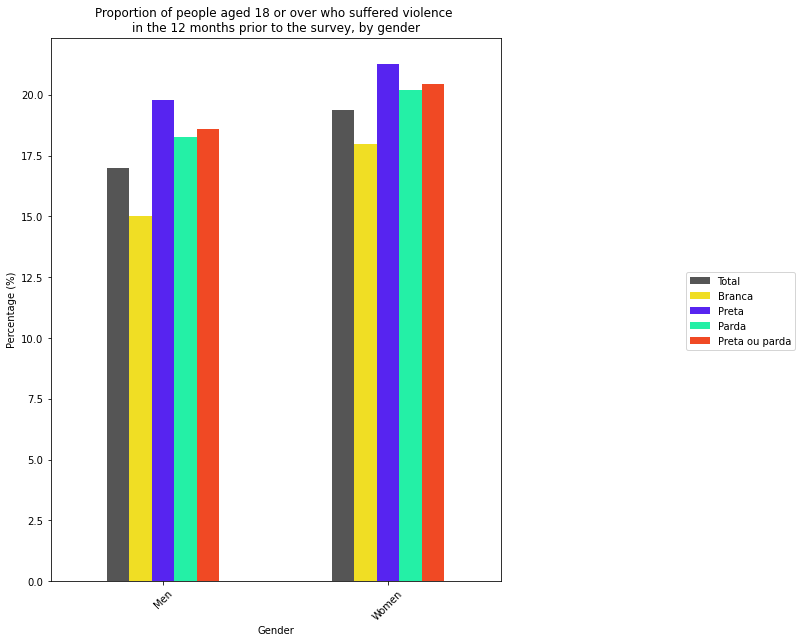

In [89]:
colours = list(islice(cycle(['#555555', '#F0DE24','#5724F0', '#24F0A6', '#F04924']), None, 5))

ax = v_pop_viol_sex.plot.bar(xlabel='Gender', ylabel='Percentage (%)', figsize=(10,10), color= colours, legend=False)
ax.set_xticklabels(['Men', 'Women'])
plt.xticks(rotation=45)

fig = ax.get_figure()
fig.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.subplots_adjust(right=0.75) 

plt.title('Proportion of people aged 18 or over who suffered violence \nin the 12 months prior to the survey, by gender')
plt.show()

In [90]:
v_pop_viol_age = v_pop_viol[5:9]

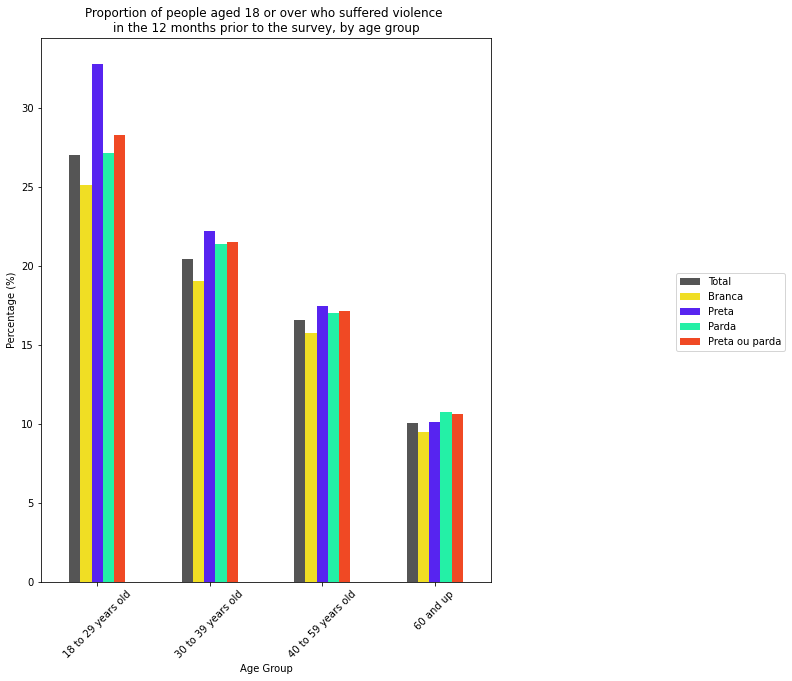

In [91]:
colours = list(islice(cycle(['#555555', '#F0DE24','#5724F0', '#24F0A6', '#F04924']), None, 5))

ax = v_pop_viol_age.plot.bar(xlabel= 'Age Group', ylabel='Percentage (%)', color=colours, legend=False, figsize=(10, 10))

ax.set_xticklabels((['18 to 29 years old', '30 to 39 years old', '40 to 59 years old', '60 and up']))
plt.xticks(rotation=45)

plt.subplots_adjust(right=0.75) 

fig = ax.get_figure()
fig.legend(loc='center left', bbox_to_anchor=(1,0.5))


plt.title('Proportion of people aged 18 or over who suffered violence \nin the 12 months prior to the survey, by age group')
plt.show()

In [92]:
v_pop_viol_edu = v_pop_viol.iloc[10:]

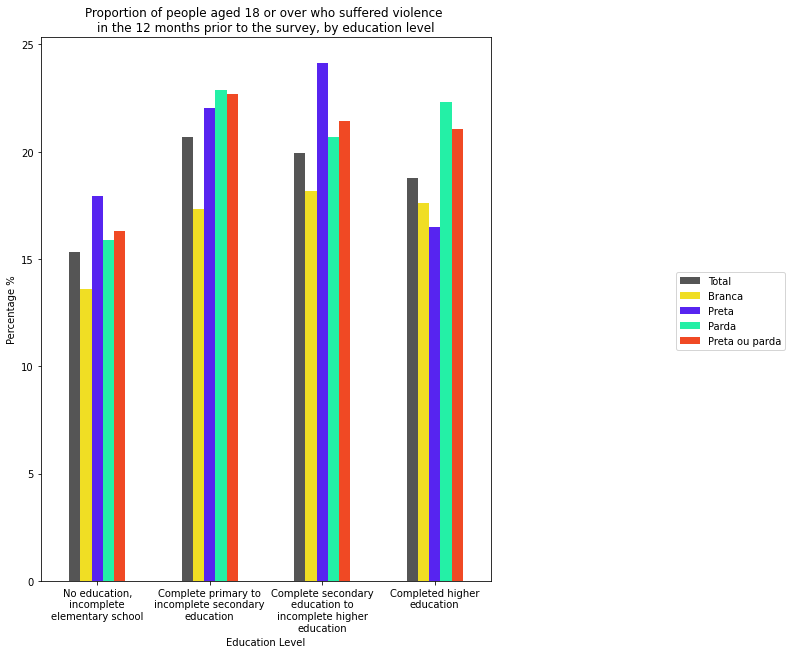

In [93]:
colours = list(islice(cycle(['#555555', '#F0DE24','#5724F0', '#24F0A6', '#F04924']), None, 5))


ax = v_pop_viol_edu.plot.bar(xlabel='Education Level', ylabel='Percentage %', figsize=(10,10), color=colours, legend=False)

labels = ['No education, incomplete elementary school', 'Complete primary to incomplete secondary education', 'Complete secondary education to incomplete higher education', 'Completed higher education']
labels = [ '\n'.join(wrap(l, 20)) for l in labels]
ax.set_xticklabels(labels)
plt.xticks(rotation=0)

plt.subplots_adjust(right=0.75) 

fig = ax.get_figure()
fig.legend(loc='center left', bbox_to_anchor=(1,0.5))


plt.title('Proportion of people aged 18 or over who suffered violence \nin the 12 months prior to the survey, by education level')
plt.show()